In [59]:
from __future__ import division
from math import *
import numpy as np
import sys
import os
from matplotlib.ticker import LogFormatter
from matplotlib.ticker import LogFormatterExponent
from matplotlib.ticker import LogFormatterSciNotation

import pandas as pd
import numpy as np
import matplotlib, os
import matplotlib.pyplot as plt
# Matplotlib configuration
matplotlib.rcParams['text.usetex'] = True
#matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.style.use('classic')
plt.rcParams['xtick.direction']     = 'in'
plt.rcParams['ytick.direction']     = 'in'
plt.rcParams['xtick.top']           = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.right']         = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import matplotlib.cm as cm

from matplotlib import pyplot
matplotlib.rcParams['text.usetex'] = True
#matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family' : "sans-serif"})
params= {'text.latex.preamble' : [r'\usepackage{amssymb}']}
pyplot.rcParams.update(params)

from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import FuncFormatter
from scipy.interpolate import griddata
from scipy.interpolate import interp1d
from shapely.geometry import Point, Polygon
import copy

/Users/oozdal/opt/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [60]:
exec(open("/Users/oozdal/packages/ExpDATA/ExDATA.py").read())

In [61]:
#combine all files in the list
mainpath = "/Users/oozdal/projects/MagMoment/Scan/data/"
all_filenames = ["NonUMSSMv4_Chi1LSP_1.csv","NonUMSSMv4_Chi1LSP_2.csv"]
combined_csv = pd.concat([pd.read_csv(mainpath+f, header=None, sep=" ") for f in all_filenames ])
#export to csv
#combined_csv.to_csv(mainpath+"Combined_NonUMSSMv4_Chi1LSP.csv", index=False, encoding='utf-8-sig')

combined_csv.columns =["MZp", "ZpWidthOverMass","BRZptoll","BRZptoqq","gpSUSY","DAEL","DAMU","Chi1","Chi2","Cha1","BRCha1toWChi1", "BRZptoCha1Cha1", "chi2STU", "Sv1", "TanBeta", \
           "Lambda","TLambda","vS", "NMIX11","NMIX12","NMIX13","NMIX14","NMIX15","NMIX16", "Se1", "M1", "M2", "M3", "M4", "Tep", "Tmup","TYe33", "WhoIsLSP", \
           "RelicDensity", "xsecpptoZp", "SIproton", "SIneutron", "sigmaV", "DAELDAMU_Sigma", "Selectron1", "Selectron2", "Smuon1", "Smuon2", "Stau1", "Stau2", \
           "i", "j", "m0", "M1IN", "M2IN", "M3IN", "M4IN", "A0", "ME012", "ME022", "ME032", 
           "ML012", "ML022", "ML032", "MVR012", "MVR022", "MVR032", "Ql1", "Ql2", "Qe1", "Qe2", "Chi3", "Cha2", "hh1", "hh1tomumu", "hh1toee"]

df = copy.deepcopy(combined_csv)
df.reset_index(drop=True, inplace=True)

# Let's see a few lines 
df.head()

MZp  ZpWidthOverMass  BRZptoll  BRZptoqq    gpSUSY          DAEL  \
0  7204.035         0.015277  0.082841  0.451902  0.461024 -8.034424e-13   
1  6813.462         0.017409  0.118714  0.281977  0.483480 -5.297234e-13   
2  6299.864         0.015051  0.054434  0.408094  0.471490 -1.077944e-12   
3  7875.719         0.017424  0.041804  0.445308  0.471660 -6.679858e-13   
4  5058.067         0.014700  0.205433  0.265605  0.501219 -2.060117e-13   

           DAMU       Chi1       Chi2       Cha1  ...      MVR032       Ql1  \
0  4.400268e-10  1419.0180  3251.0620  3249.8520  ...   6474949.0 -0.142857   
1  9.606797e-10   992.6819 -1003.7620   995.1132  ...  13737130.0 -0.333333   
2  7.365571e-10   455.8807  1681.9910   456.0103  ...  13204580.0  0.333333   
3  1.129891e-09   757.6544  -777.1562   759.0685  ...  12752490.0 -0.333333   
4  1.287903e-09  1713.4500  1713.8960  1714.5180  ...   6035462.0 -0.250000   

        Ql2       Qe1       Qe2       Chi3       Cha2       hh1  hh1tomumu  \
0 -0.571429 -0.285714  0.142857 -3361.7520  3406.1470  123.5929   0.000338   
1 -0.666667  0.000000  0.333333  1381.5610  1380.9450  124.2636   0.000330   
2  0.166667  0.166667  0.333333 -2298.2280  2299.4430  126.3726   0.000301   
3 -0.111111 -0.111111 -0.333333   951.0969   951.2761  124.7763   0.000323   
4  0.625000  0.625000 -0.250000 -1977.1620  2914.2930  123.3194   0.000347   

   hh1toee  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  

[5 rows x 71 columns]

In [62]:
# Let's slice and reorder the dataframe
df_sub = df[['DAEL','DAMU','vS','gpSUSY','MZp','Lambda','TLambda','TYe33','Tep','Tmup','M1','M2','M3','M4', \
             'Chi1','Cha1','TanBeta', 'DAELDAMU_Sigma', "WhoIsLSP", "RelicDensity", "xsecpptoZp", "SIproton", "SIneutron", "sigmaV",
             'NMIX11', 'NMIX12', 'NMIX13', 'NMIX14', 'NMIX15', 'NMIX16',"BRZptoll", "Selectron1", "Selectron2", "Smuon1", "Smuon2",
             "Stau1", "Stau2", "i", "j", "m0", "M1IN", "M2IN", "M3IN", "M4IN", "A0", "ME012", "ME022", "ME032", 
             "ML012", "ML022", "ML032", "MVR012", "MVR022", "MVR032", "Chi2", "Chi3", "Cha2", "hh1", "hh1tomumu", 
             "Ql2", "Qe2", "hh1toee", "Sv1", "Se1"]]
# Let's see a few lines 
df_sub.head()

DAEL          DAMU        vS    gpSUSY       MZp    Lambda  \
0 -8.034424e-13  4.400268e-10  15554.40  0.461024  7204.035  0.304238   
1 -5.297234e-13  9.606797e-10  16806.53  0.483480  6813.462  0.082405   
2 -1.077944e-12  7.365571e-10  13375.53  0.471490  6299.864  0.240866   
3 -6.679858e-13  1.129891e-09  16618.48  0.471660  7875.719  0.064426   
4 -2.060117e-13  1.287903e-09  13379.48  0.501219  5058.067  0.178568   

      TLambda     TYe33       Tep      Tmup  ...       Chi2       Chi3  \
0   5733.4860  -59.1215 -3204.901  4354.516  ...  3251.0620 -3361.7520   
1   1197.3230 -285.3034 -3026.312  5271.951  ... -1003.7620  1381.5610   
2   8512.0870  -80.1817 -2638.551  8103.340  ...  1681.9910 -2298.2280   
3  13146.3200   40.3030  2366.987 -5144.933  ...  -777.1562   951.0969   
4    808.6221 -168.7672  1887.456 -8119.648  ...  1713.8960 -1977.1620   

        Cha2       hh1  hh1tomumu       Ql2       Qe2 hh1toee       Sv1  \
0  3406.1470  123.5929   0.000338 -0.571429  0.142857     0.0  2544.592   
1  1380.9450  124.2636   0.000330 -0.666667  0.333333     0.0  2203.327   
2  2299.4430  126.3726   0.000301  0.166667  0.333333     0.0  3057.367   
3   951.2761  124.7763   0.000323 -0.111111 -0.333333     0.0  2015.156   
4  2914.2930  123.3194   0.000347  0.625000 -0.250000     0.0  2661.843   

        Se1  
0  2055.669  
1  2152.549  
2  2760.621  
3  1976.855  
4  2663.243  

[5 rows x 64 columns]

In [63]:
df_sub = df_sub[(df_sub['DAEL'] < 0)]

# Let's see the solutions with electron g-2 (DAEL) and muon g-2 (DAMU) is within 1,2 and 3 sigma!
df_sub_123sigma = df_sub[(df_sub['DAELDAMU_Sigma'].values != None )]

# Let's see a few lines 
df_sub_123sigma.head()
len(df_sub_123sigma)

22535

In [64]:
# Let's see the solutions with electron g-2 (DAEL) and muon g-2 (DAMU) is within only 3 sigma!
df_sub_3sigma = df_sub[(df_sub['DAELDAMU_Sigma'] == "3sigma")]

# Let's see a few lines 
df_sub_3sigma.head()

DAEL          DAMU        vS    gpSUSY       MZp    Lambda  \
0 -8.034424e-13  4.400268e-10  15554.40  0.461024  7204.035  0.304238   
1 -5.297234e-13  9.606797e-10  16806.53  0.483480  6813.462  0.082405   
2 -1.077944e-12  7.365571e-10  13375.53  0.471490  6299.864  0.240866   
3 -6.679858e-13  1.129891e-09  16618.48  0.471660  7875.719  0.064426   
4 -2.060117e-13  1.287903e-09  13379.48  0.501219  5058.067  0.178568   

      TLambda     TYe33       Tep      Tmup  ...       Chi2       Chi3  \
0   5733.4860  -59.1215 -3204.901  4354.516  ...  3251.0620 -3361.7520   
1   1197.3230 -285.3034 -3026.312  5271.951  ... -1003.7620  1381.5610   
2   8512.0870  -80.1817 -2638.551  8103.340  ...  1681.9910 -2298.2280   
3  13146.3200   40.3030  2366.987 -5144.933  ...  -777.1562   951.0969   
4    808.6221 -168.7672  1887.456 -8119.648  ...  1713.8960 -1977.1620   

        Cha2       hh1  hh1tomumu       Ql2       Qe2 hh1toee       Sv1  \
0  3406.1470  123.5929   0.000338 -0.571429  0.142857     0.0  2544.592   
1  1380.9450  124.2636   0.000330 -0.666667  0.333333     0.0  2203.327   
2  2299.4430  126.3726   0.000301  0.166667  0.333333     0.0  3057.367   
3   951.2761  124.7763   0.000323 -0.111111 -0.333333     0.0  2015.156   
4  2914.2930  123.3194   0.000347  0.625000 -0.250000     0.0  2661.843   

        Se1  
0  2055.669  
1  2152.549  
2  2760.621  
3  1976.855  
4  2663.243  

[5 rows x 64 columns]

In [65]:
# Let's see the solutions with electron g-2 (DAEL) and muon g-2 (DAMU) is within 2 sigma!
df_sub_2sigma = df_sub[(df_sub['DAELDAMU_Sigma'] == "2sigma")]

# Let's see a few lines 
df_sub_2sigma.head()

DAEL          DAMU        vS    gpSUSY       MZp    Lambda  \
5  -8.214394e-13  1.392978e-09  13897.28  0.465065  6465.236  0.365956   
6  -3.772227e-13  2.238636e-09  13321.33  0.452920  6050.331  0.280865   
8  -6.736293e-13  1.506294e-09  13138.59  0.455772  5361.502  0.172840   
12 -7.931820e-13  1.707081e-09  16195.88  0.454807  7403.426  0.239686   
16 -1.739835e-13  4.134452e-09  14483.47  0.470734  6806.706  0.265843   

      TLambda      TYe33        Tep      Tmup  ...      Chi2      Chi3  \
5    9836.047  154.73240 -5211.9120  6958.416  ... -3025.016  3612.303   
6   11462.620   21.82407  1078.5880 -6053.333  ... -1445.103  2676.997   
8    5783.919  -17.34576  5580.7650 -3799.817  ...  1358.594 -1630.282   
12  12509.980  179.93200 -4620.4400  6342.960  ... -2784.063  2788.680   
16   8519.303  203.98760   296.5607 -5554.581  ... -2723.186  2742.489   

        Cha2       hh1  hh1tomumu       Ql2       Qe2 hh1toee       Sv1  \
5   3616.535  124.7034   0.000339  0.285714  0.142857     0.0  3763.516   
6   2677.959  126.3885   0.000304  0.142857 -0.714286     0.0  3054.300   
8   1643.486  123.5102   0.000339  0.111111 -0.666667     0.0  1917.687   
12  3480.931  123.0632   0.000362 -0.142857 -0.428571     0.0  2639.628   
16  2878.550  127.5192   0.000293 -0.222222 -0.222222     0.0  1595.408   

         Se1  
5   1661.776  
6   1212.281  
8   1249.576  
12  1113.342  
16  1582.540  

[5 rows x 64 columns]

In [66]:
# Let's see the solutions with electron g-2 (DAEL) and muon g-2 (DAMU) is within 1 sigma!
df_sub_1sigma = df_sub[(df_sub['DAELDAMU_Sigma'] == "1sigma")]

# Let's see a few lines 
df_sub_1sigma.head()

DAEL          DAMU        vS    gpSUSY       MZp    Lambda  \
13 -7.849337e-13  2.344367e-09  15083.27  0.459846  6953.568  0.259576   
15 -4.827529e-13  3.636135e-09  18054.95  0.472235  8530.457  0.312874   
17 -4.741351e-13  3.718716e-09  13260.50  0.475063  5749.911  0.158407   
22 -7.236331e-13  2.272616e-09  15341.59  0.499106  6021.505  0.159302   
31 -7.788465e-13  2.434830e-09  14932.72  0.466821  7005.968  0.363248   

     TLambda      TYe33       Tep      Tmup  ...      Chi2      Chi3  \
13  6703.723   69.26757  1901.987 -8515.310  ... -1854.152  2788.653   
15  4400.941  260.31190 -1374.265  9480.184  ... -2575.734  4022.971   
17  8494.381  344.35430  4853.156 -7660.233  ...  1206.640 -1517.607   
22  9133.576  430.98750  4580.579 -8184.417  ...  1284.764 -1756.539   
31  5103.923  169.30600  5949.608 -6538.561  ... -1825.666  3880.545   

        Cha2       hh1  hh1tomumu       Ql2       Qe2 hh1toee       Sv1  \
13  2789.581  124.8349   0.000342  0.571429 -0.142857     0.0  2413.045   
15  4024.829  122.7391   0.000376 -0.222222 -0.222222     0.0  1659.426   
17  1526.902  126.1125   0.000312 -0.200000  0.600000     0.0  2797.112   
22  1762.633  125.9261   0.000320  0.111111 -0.444444     0.0  2761.682   
31  3881.814  125.3232   0.000326 -0.285714 -0.142857     0.0  1419.935   

         Se1  
13  1998.757  
15  1660.198  
17  2693.817  
22  2713.080  
31  1378.157  

[5 rows x 64 columns]

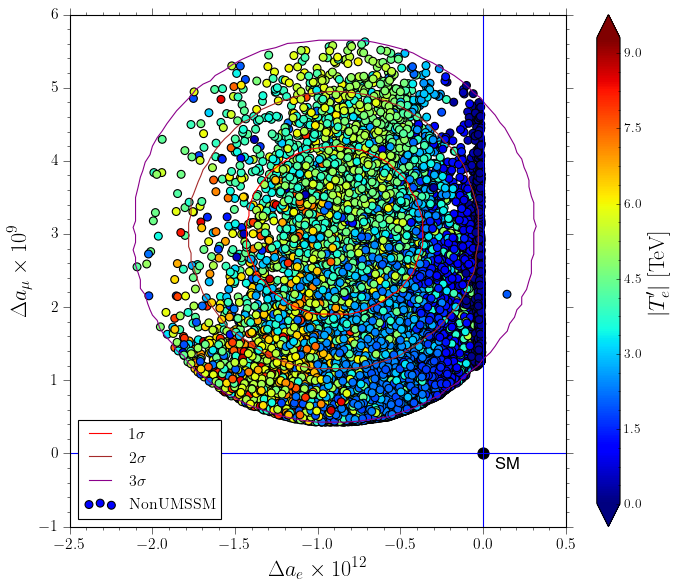

In [26]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')


col = np.array(abs(df_sub_123sigma["Tep"]))/1000.
sc1 = ax1.scatter(np.array(df_sub_123sigma["DAEL"])*10**12, np.array(df_sub_123sigma["DAMU"])*10**9, c=col, cmap=cm, marker='o', s=50, label=r"$ {\rm\ NonUMSSM} $")

#cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
cbar1 = plt.colorbar(sc1, extend='both')

sc1 = ax1.scatter(np.array(0)*10**12, np.array(0)*10**9, c="black", marker='o', s=100)

sc1 = ax1.plot(np.array(G2_1sig["DAEL"]), np.array(G2_1sig["DAMU"]), c="red", label=r"$ {1 \sigma} $")
sc1 = ax1.plot(np.array(G2_2sig["DAEL"]), np.array(G2_2sig["DAMU"]), c="brown", label=r"$ {2 \sigma} $")
sc1 = ax1.plot(np.array(G2_3sig["DAEL"]), np.array(G2_3sig["DAMU"]), c="darkmagenta", label=r"$ {3 \sigma} $")

cbar1.set_label(r"$\displaystyle \vert T^\prime_e \vert {\rm\ [TeV]} $", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle \Delta a_e \times 10^{12} $ ", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle \Delta a_\mu \times 10^9 $ ", fontsize=20)

plt.axhline(y=0., color='b', linestyle='-')
plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([-2.5,0.5])
plt.ylim([-1.,6.])

#plt.xscale('log')
#plt.yscale('log')

plt.text(0.07, -0.2, "SM", fontsize=15)
#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='best',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/LeptonG2/Tep.png') # dpi = 300 # save the figure to file
#plt.close(fig)

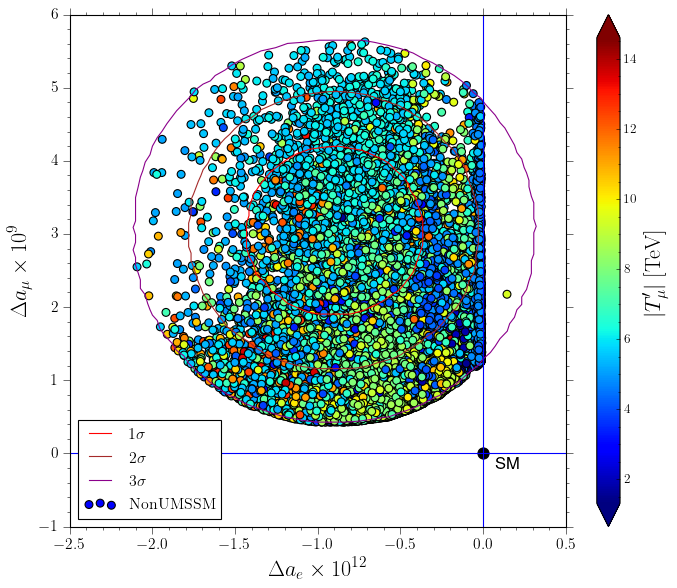

In [27]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')


col = np.array(abs(df_sub_123sigma["Tmup"]))/1000.
sc1 = ax1.scatter(np.array(df_sub_123sigma["DAEL"])*10**12, np.array(df_sub_123sigma["DAMU"])*10**9, c=col, cmap=cm, marker='o', s=50, label=r"$ {\rm\ NonUMSSM} $")

#cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
cbar1 = plt.colorbar(sc1, extend='both')

sc1 = ax1.scatter(np.array(0)*10**12, np.array(0)*10**9, c="black", marker='o', s=100)

sc1 = ax1.plot(np.array(G2_1sig["DAEL"]), np.array(G2_1sig["DAMU"]), c="red", label=r"$ {1 \sigma} $")
sc1 = ax1.plot(np.array(G2_2sig["DAEL"]), np.array(G2_2sig["DAMU"]), c="brown", label=r"$ {2 \sigma} $")
sc1 = ax1.plot(np.array(G2_3sig["DAEL"]), np.array(G2_3sig["DAMU"]), c="darkmagenta", label=r"$ {3 \sigma} $")

cbar1.set_label(r"$\displaystyle \vert T^\prime_\mu \vert {\rm\ [TeV]} $", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle \Delta a_e \times 10^{12} $ ", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle \Delta a_\mu \times 10^9 $ ", fontsize=20)

plt.axhline(y=0., color='b', linestyle='-')
plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([-2.5,0.5])
plt.ylim([-1.,6.])

#plt.xscale('log')
#plt.yscale('log')

plt.text(0.07, -0.2, "SM", fontsize=15)
#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='best',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/LeptonG2/Tmup.png') # dpi = 300 # save the figure to file
#plt.close(fig)

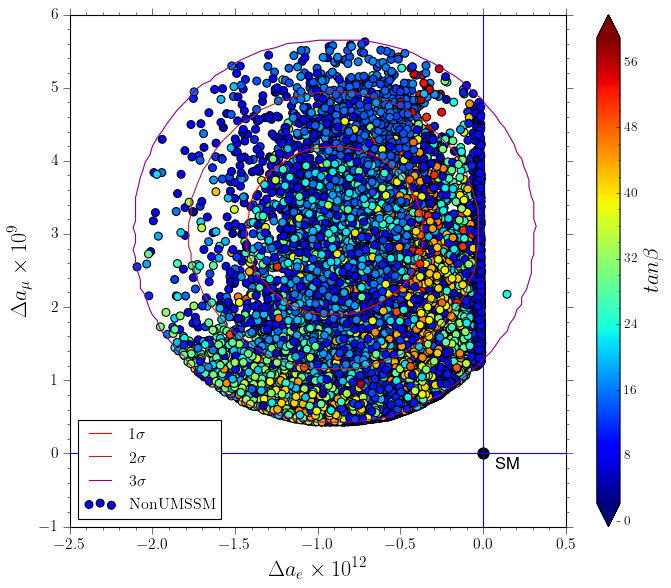

In [28]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')


col = np.array(df_sub_123sigma["TanBeta"])
sc1 = ax1.scatter(np.array(df_sub_123sigma["DAEL"])*10**12, np.array(df_sub_123sigma["DAMU"])*10**9, c=col, cmap=cm, marker='o', s=50, label=r"$ {\rm\ NonUMSSM} $")

#cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
cbar1 = plt.colorbar(sc1, extend='both')

sc1 = ax1.scatter(np.array(0)*10**12, np.array(0)*10**9, c="black", marker='o', s=100)

sc1 = ax1.plot(np.array(G2_1sig["DAEL"]), np.array(G2_1sig["DAMU"]), c="red", label=r"$ {1 \sigma} $")
sc1 = ax1.plot(np.array(G2_2sig["DAEL"]), np.array(G2_2sig["DAMU"]), c="brown", label=r"$ {2 \sigma} $")
sc1 = ax1.plot(np.array(G2_3sig["DAEL"]), np.array(G2_3sig["DAMU"]), c="darkmagenta", label=r"$ {3 \sigma} $")

cbar1.set_label(r"$\displaystyle tan\beta $", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle \Delta a_e \times 10^{12} $ ", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle \Delta a_\mu \times 10^9 $ ", fontsize=20)

plt.axhline(y=0., color='b', linestyle='-')
plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([-2.5,0.5])
plt.ylim([-1.,6.])

#plt.xscale('log')
#plt.yscale('log')

plt.text(0.07, -0.2, "SM", fontsize=15)
#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='best',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/LeptonG2/TanBeta.png') # dpi = 300 # save the figure to file
#plt.close(fig)

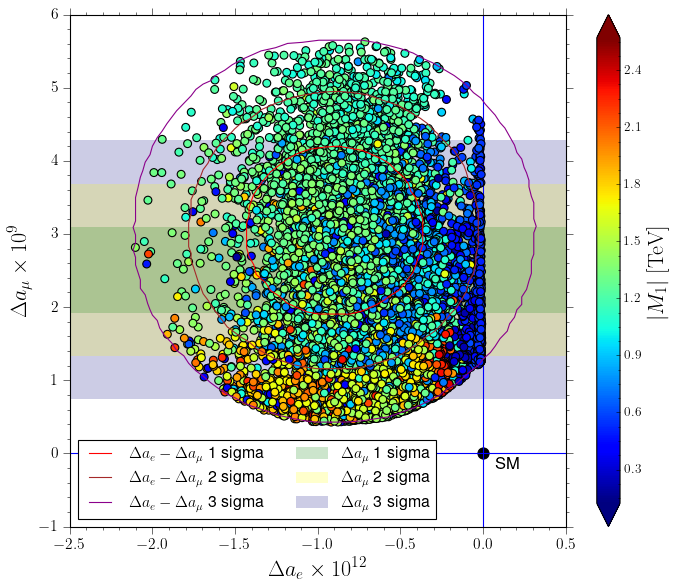

In [105]:
# BinoPrimeLike = np.array(df_sub_123sigma["NMIX11"])**2
# BinoLike      = np.array(df_sub_123sigma["NMIX12"])**2
# BinoMixing    = np.array(df_sub_123sigma["NMIX11"])**2 + np.array(df_sub_123sigma["NMIX12"])**2
# WinoLike      = np.array(df_sub_123sigma["NMIX13"])**2
# HiggsinoLike  = np.array(df_sub_123sigma["NMIX14"])**2 + np.array(df_sub_123sigma["NMIX15"])**2
# SLike         = np.array(df_sub_123sigma["NMIX16"])**2

################################################################

df_sub_123sigma_BinoLSP = df_sub_123sigma[  ( abs(df_sub_123sigma["NMIX12"])**2 >= 0.90 ) ] # Exclude all solution Higgsino content less than 40%
BinoLike      = np.array(abs(df_sub_123sigma_BinoLSP["NMIX12"]))**2

################################################################



pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')

col = np.array(abs(df_sub_123sigma_BinoLSP["M1"]))/1000.
sc1 = ax1.scatter(np.array(df_sub_123sigma_BinoLSP["DAEL"])*10**12, np.array(df_sub_123sigma_BinoLSP["DAMU"])*10**9, c=col, cmap=cm, marker='o', s=50, zorder =5) #label=r"$ {\rm\ NonUMSSM} $")

#cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
cbar1 = plt.colorbar(sc1, extend='both')

sc1 = ax1.scatter(np.array(0)*10**12, np.array(0)*10**9, c="black", marker='o', s=100)

sc1 = ax1.plot(np.array(G2_1sig["DAEL"]), np.array(G2_1sig["DAMU"]), c="red", label=r"$ \Delta a_e - \Delta a_{\mu}$ 1 sigma", zorder = 12)
sc1 = ax1.plot(np.array(G2_2sig["DAEL"]), np.array(G2_2sig["DAMU"]), c="brown", label=r"$ \Delta a_e - \Delta a_{\mu}$ 2 sigma", zorder= 11)
sc1 = ax1.plot(np.array(G2_3sig["DAEL"]), np.array(G2_3sig["DAMU"]), c="darkmagenta", label=r"$ \Delta a_e - \Delta a_{\mu}$ 3 sigma", zorder=10)

ax1.axhspan(2.51 - 0.59, 2.51 + 0.59,color='green',fill=True,alpha=.2,linewidth=0.0,zorder=2, 
            label=r"$\Delta a_{\mu}$ 1 sigma")
ax1.axhspan(2.51 - 0.59*2, 2.51 + 0.59*2,color='yellow',fill=True,alpha=.2,linewidth=0.0,zorder=1,
            label=r"$\Delta a_{\mu}$ 2 sigma")
ax1.axhspan(2.51 - 0.59*3, 2.51 + 0.59*3,color='navy',fill=True,alpha=.2,linewidth=0.0,zorder=0,
            label=r"$\Delta a_{\mu}$ 3 sigma")



cbar1.set_label(r"$\displaystyle \vert M_1 \vert {\rm\ [TeV]}$", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle \Delta a_e \times 10^{12} $ ", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle \Delta a_\mu \times 10^9 $ ", fontsize=20)



plt.axhline(y=0., color='b', linestyle='-')
plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([-2.5,0.5])
plt.ylim([-1.,6.])

#plt.xscale('log')
#plt.yscale('log')

plt.text(0.07, -0.2, "SM", fontsize=15)
#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='best',frameon=True, ncol=2)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/LeptonG2/M1.png') # dpi = 300 # save the figure to file
#plt.close(fig)

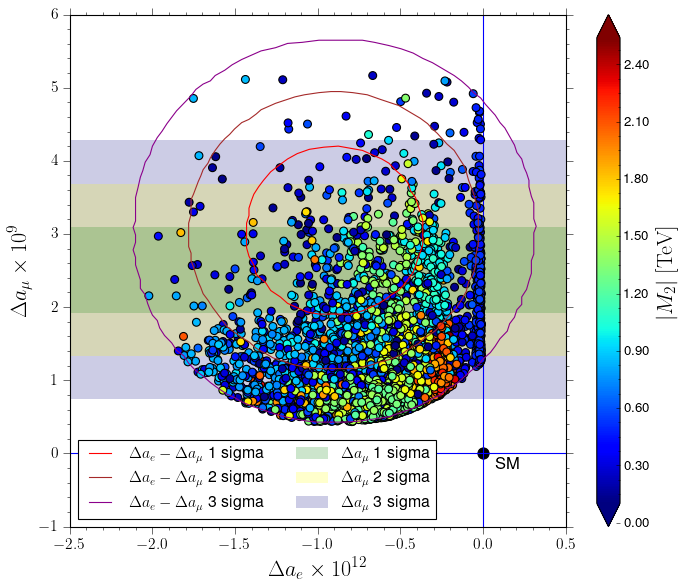

In [108]:
# BinoPrimeLike = np.array(df_sub_123sigma["NMIX11"])**2
# BinoLike      = np.array(df_sub_123sigma["NMIX12"])**2
# BinoMixing    = np.array(df_sub_123sigma["NMIX11"])**2 + np.array(df_sub_123sigma["NMIX12"])**2
# WinoLike      = np.array(df_sub_123sigma["NMIX13"])**2
# HiggsinoLike  = np.array(df_sub_123sigma["NMIX14"])**2 + np.array(df_sub_123sigma["NMIX15"])**2
# SLike         = np.array(df_sub_123sigma["NMIX16"])**2

################################################################

df_sub_123sigma_WinoLSP = df_sub_123sigma[  ((df_sub_123sigma["NMIX13"])**2 >= 0.9) ] # Exclude all solution Wino content less than 40%
WinoLike      = np.array(df_sub_123sigma_WinoLSP["NMIX13"])**2

################################################################


pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')


col = np.array(abs(df_sub_123sigma_WinoLSP["M2"]))/1000.
sc1 = ax1.scatter(np.array(df_sub_123sigma_WinoLSP["DAEL"])*10**12, np.array(df_sub_123sigma_WinoLSP["DAMU"])*10**9, c=col, cmap=cm, marker='o', s=50, zorder=5)   # label=r"$ {\rm\ NonUMSSM} $")

cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
#cbar1 = plt.colorbar(sc1, extend='both')

sc1 = ax1.scatter(np.array(0)*10**12, np.array(0)*10**9, c="black", marker='o', s=100)

sc1 = ax1.plot(np.array(G2_1sig["DAEL"]), np.array(G2_1sig["DAMU"]), c="red", label=r"$ \Delta a_e - \Delta a_{\mu}$ 1 sigma", zorder = 12)
sc1 = ax1.plot(np.array(G2_2sig["DAEL"]), np.array(G2_2sig["DAMU"]), c="brown", label=r"$ \Delta a_e - \Delta a_{\mu}$ 2 sigma", zorder= 11)
sc1 = ax1.plot(np.array(G2_3sig["DAEL"]), np.array(G2_3sig["DAMU"]), c="darkmagenta", label=r"$ \Delta a_e - \Delta a_{\mu}$ 3 sigma", zorder=10)

ax1.axhspan(2.51 - 0.59, 2.51 + 0.59,color='green',fill=True,alpha=.2,linewidth=0.0,zorder=2, 
            label=r"$\Delta a_{\mu}$ 1 sigma")
ax1.axhspan(2.51 - 0.59*2, 2.51 + 0.59*2,color='yellow',fill=True,alpha=.2,linewidth=0.0,zorder=1,
            label=r"$\Delta a_{\mu}$ 2 sigma")
ax1.axhspan(2.51 - 0.59*3, 2.51 + 0.59*3,color='navy',fill=True,alpha=.2,linewidth=0.0,zorder=0,
            label=r"$\Delta a_{\mu}$ 3 sigma")

cbar1.set_label(r"$\displaystyle \vert M_2 \vert {\rm\ [TeV]}$", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle \Delta a_e \times 10^{12} $ ", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle \Delta a_\mu \times 10^9 $ ", fontsize=20)

plt.axhline(y=0., color='b', linestyle='-')
plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([-2.5,0.5])
plt.ylim([-1.,6.])

#plt.xscale('log')
#plt.yscale('log')

plt.text(0.07, -0.2, "SM", fontsize=15)
#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='best',frameon=True, ncol=2)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/LeptonG2/M2.png') # dpi = 300 # save the figure to file
#plt.close(fig)

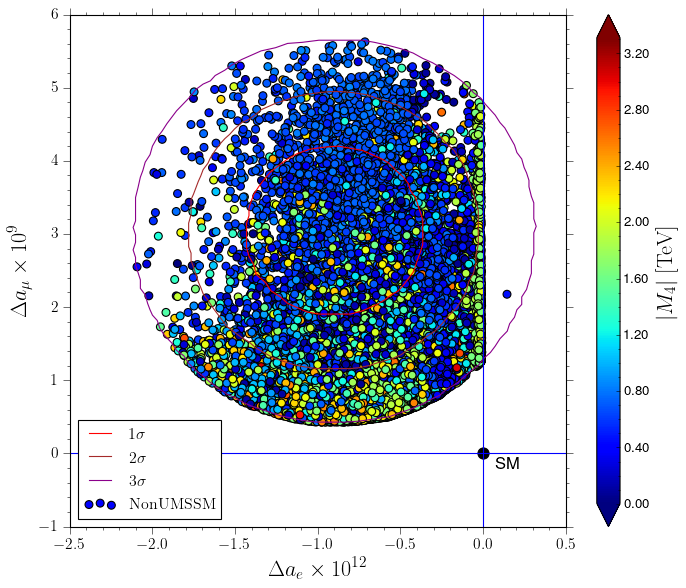

In [31]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')


col = np.array(abs(df_sub_123sigma["M4"]))/1000.
sc1 = ax1.scatter(np.array(df_sub_123sigma["DAEL"])*10**12, np.array(df_sub_123sigma["DAMU"])*10**9, c=col, cmap=cm, marker='o', s=50, label=r"$ {\rm\ NonUMSSM} $")

cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
#cbar1 = plt.colorbar(sc1, extend='both')

sc1 = ax1.scatter(np.array(0)*10**12, np.array(0)*10**9, c="black", marker='o', s=100)

sc1 = ax1.plot(np.array(G2_1sig["DAEL"]), np.array(G2_1sig["DAMU"]), c="red", label=r"$ {1 \sigma} $")
sc1 = ax1.plot(np.array(G2_2sig["DAEL"]), np.array(G2_2sig["DAMU"]), c="brown", label=r"$ {2 \sigma} $")
sc1 = ax1.plot(np.array(G2_3sig["DAEL"]), np.array(G2_3sig["DAMU"]), c="darkmagenta", label=r"$ {3 \sigma} $")

cbar1.set_label(r"$\displaystyle \vert M_4 \vert {\rm\ [TeV]}$", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle \Delta a_e \times 10^{12} $ ", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle \Delta a_\mu \times 10^9 $ ", fontsize=20)

plt.axhline(y=0., color='b', linestyle='-')
plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([-2.5,0.5])
plt.ylim([-1.,6.])

#plt.xscale('log')
#plt.yscale('log')

plt.text(0.07, -0.2, "SM", fontsize=15)
#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='best',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/LeptonG2/M4.png') # dpi = 300 # save the figure to file
#plt.close(fig)

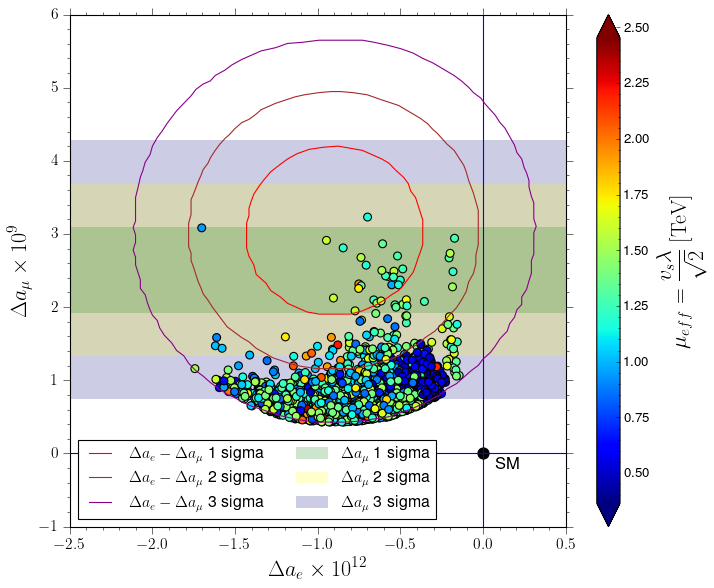

In [109]:
# BinoPrimeLike = np.array(df_sub_123sigma["NMIX11"])**2
# BinoLike      = np.array(df_sub_123sigma["NMIX12"])**2
# BinoMixing    = np.array(df_sub_123sigma["NMIX11"])**2 + np.array(df_sub_123sigma["NMIX12"])**2
# WinoLike      = np.array(df_sub_123sigma["NMIX13"])**2
# HiggsinoLike  = np.array(df_sub_123sigma["NMIX14"])**2 + np.array(df_sub_123sigma["NMIX15"])**2
# SLike         = np.array(df_sub_123sigma["NMIX16"])**2

################################################################

df_sub_123sigma_HiggsinoLSP = df_sub_123sigma[  ( ( df_sub_123sigma["NMIX14"])**2 + (df_sub_123sigma["NMIX15"])**2 >= 0.9 ) ] # Exclude all solution Higgsino content less than 40%
HiggsinoLike      = np.array(df_sub_123sigma_HiggsinoLSP["NMIX14"])**2 + np.array(df_sub_123sigma_HiggsinoLSP["NMIX15"])**2

################################################################

pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')


col = (np.array(df_sub_123sigma_HiggsinoLSP["vS"]*df_sub_123sigma_HiggsinoLSP["Lambda"])/sqrt(2))/1000.
sc1 = ax1.scatter(np.array(df_sub_123sigma_HiggsinoLSP["DAEL"])*10**12, np.array(df_sub_123sigma_HiggsinoLSP["DAMU"])*10**9, c=col, cmap=cm, marker='o', s=50, zorder=5) #label=r"$ {\rm\ NonUMSSM} $")

cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
#cbar1 = plt.colorbar(sc1, extend='both')

sc1 = ax1.scatter(np.array(0)*10**12, np.array(0)*10**9, c="black", marker='o', s=100)

sc1 = ax1.plot(np.array(G2_1sig["DAEL"]), np.array(G2_1sig["DAMU"]), c="red", label=r"$ \Delta a_e - \Delta a_{\mu}$ 1 sigma", zorder = 12)
sc1 = ax1.plot(np.array(G2_2sig["DAEL"]), np.array(G2_2sig["DAMU"]), c="brown", label=r"$ \Delta a_e - \Delta a_{\mu}$ 2 sigma", zorder= 11)
sc1 = ax1.plot(np.array(G2_3sig["DAEL"]), np.array(G2_3sig["DAMU"]), c="darkmagenta", label=r"$ \Delta a_e - \Delta a_{\mu}$ 3 sigma", zorder=10)

ax1.axhspan(2.51 - 0.59, 2.51 + 0.59,color='green',fill=True,alpha=.2,linewidth=0.0,zorder=2, 
            label=r"$\Delta a_{\mu}$ 1 sigma")
ax1.axhspan(2.51 - 0.59*2, 2.51 + 0.59*2,color='yellow',fill=True,alpha=.2,linewidth=0.0,zorder=1,
            label=r"$\Delta a_{\mu}$ 2 sigma")
ax1.axhspan(2.51 - 0.59*3, 2.51 + 0.59*3,color='navy',fill=True,alpha=.2,linewidth=0.0,zorder=0,
            label=r"$\Delta a_{\mu}$ 3 sigma")

cbar1.set_label(r"$\displaystyle \mu_{eff} = \frac{v_s \lambda}{\sqrt{2}} {\rm\ [TeV]}$", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle \Delta a_e \times 10^{12} $ ", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle \Delta a_\mu \times 10^9 $ ", fontsize=20)

plt.axhline(y=0., color='b', linestyle='-')
plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([-2.5,0.5])
plt.ylim([-1.,6.])

#plt.xscale('log')
#plt.yscale('log')

plt.text(0.07, -0.2, "SM", fontsize=15)
#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='best',frameon=True, ncol=2)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/LeptonG2/MuEff.png') # dpi = 300 # save the figure to file
#plt.close(fig)

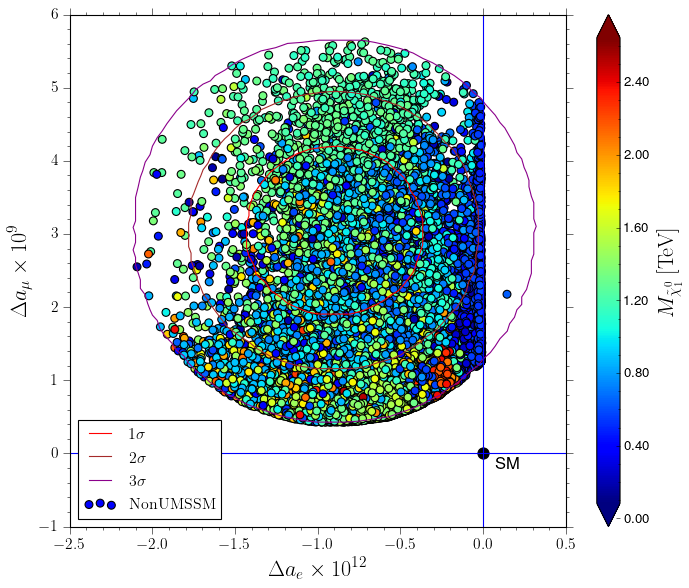

In [33]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')


col = (df_sub_123sigma["Chi1"])/1000.
sc1 = ax1.scatter(np.array(df_sub_123sigma["DAEL"])*10**12, np.array(df_sub_123sigma["DAMU"])*10**9, c=col, cmap=cm, marker='o', s=50, label=r"$ {\rm\ NonUMSSM} $")

cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
#cbar1 = plt.colorbar(sc1, extend='both')

sc1 = ax1.scatter(np.array(0)*10**12, np.array(0)*10**9, c="black", marker='o', s=100)

sc1 = ax1.plot(np.array(G2_1sig["DAEL"]), np.array(G2_1sig["DAMU"]), c="red", label=r"$ {1 \sigma} $")
sc1 = ax1.plot(np.array(G2_2sig["DAEL"]), np.array(G2_2sig["DAMU"]), c="brown", label=r"$ {2 \sigma} $")
sc1 = ax1.plot(np.array(G2_3sig["DAEL"]), np.array(G2_3sig["DAMU"]), c="darkmagenta", label=r"$ {3 \sigma} $")

cbar1.set_label(r"$\displaystyle M_{\tilde{\chi}_1^0} {\rm\ [TeV]}$", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle \Delta a_e \times 10^{12} $ ", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle \Delta a_\mu \times 10^9 $ ", fontsize=20)

plt.axhline(y=0., color='b', linestyle='-')
plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([-2.5,0.5])
plt.ylim([-1.,6.])

#plt.xscale('log')
#plt.yscale('log')

plt.text(0.07, -0.2, "SM", fontsize=15)
#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='best',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/LeptonG2/Chi1.png') # dpi = 300 # save the figure to file
#plt.close(fig)

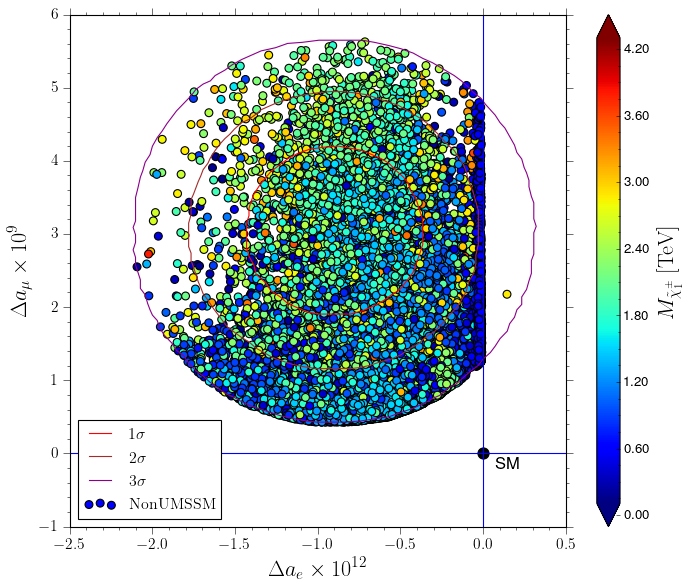

In [34]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')


col = (df_sub_123sigma["Cha1"])/1000.
sc1 = ax1.scatter(np.array(df_sub_123sigma["DAEL"])*10**12, np.array(df_sub_123sigma["DAMU"])*10**9, c=col, cmap=cm, marker='o', s=50, label=r"$ {\rm\ NonUMSSM} $")

cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
#cbar1 = plt.colorbar(sc1, extend='both')

sc1 = ax1.scatter(np.array(0)*10**12, np.array(0)*10**9, c="black", marker='o', s=100)

sc1 = ax1.plot(np.array(G2_1sig["DAEL"]), np.array(G2_1sig["DAMU"]), c="red", label=r"$ {1 \sigma} $")
sc1 = ax1.plot(np.array(G2_2sig["DAEL"]), np.array(G2_2sig["DAMU"]), c="brown", label=r"$ {2 \sigma} $")
sc1 = ax1.plot(np.array(G2_3sig["DAEL"]), np.array(G2_3sig["DAMU"]), c="darkmagenta", label=r"$ {3 \sigma} $")

cbar1.set_label(r"$\displaystyle M_{\tilde{\chi}_1^\pm} {\rm\ [TeV]}$", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle \Delta a_e \times 10^{12} $ ", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle \Delta a_\mu \times 10^9 $ ", fontsize=20)

plt.axhline(y=0., color='b', linestyle='-')
plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([-2.5,0.5])
plt.ylim([-1.,6.])

#plt.xscale('log')
#plt.yscale('log')

plt.text(0.07, -0.2, "SM", fontsize=15)
#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='best',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/LeptonG2/Cha1.png') # dpi = 300 # save the figure to file
#plt.close(fig)

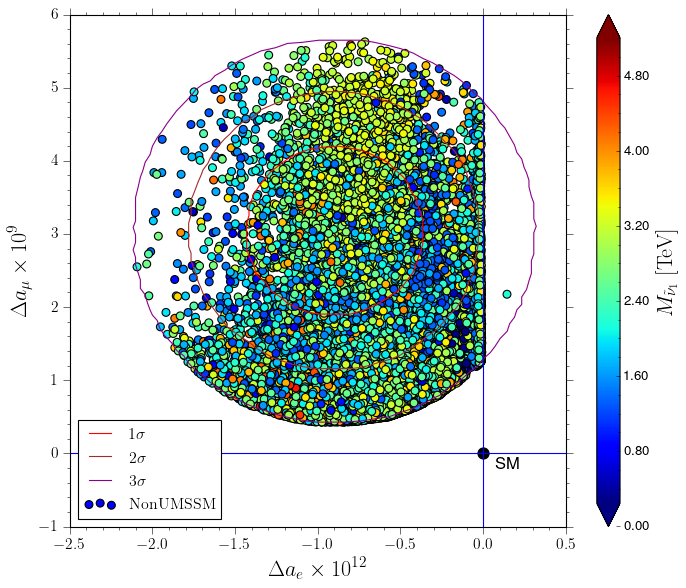

In [35]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')


col = (df_sub_123sigma["Sv1"])/1000.
sc1 = ax1.scatter(np.array(df_sub_123sigma["DAEL"])*10**12, np.array(df_sub_123sigma["DAMU"])*10**9, c=col, cmap=cm, marker='o', s=50, label=r"$ {\rm\ NonUMSSM} $")

cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
#cbar1 = plt.colorbar(sc1, extend='both')

sc1 = ax1.scatter(np.array(0)*10**12, np.array(0)*10**9, c="black", marker='o', s=100)

sc1 = ax1.plot(np.array(G2_1sig["DAEL"]), np.array(G2_1sig["DAMU"]), c="red", label=r"$ {1 \sigma} $")
sc1 = ax1.plot(np.array(G2_2sig["DAEL"]), np.array(G2_2sig["DAMU"]), c="brown", label=r"$ {2 \sigma} $")
sc1 = ax1.plot(np.array(G2_3sig["DAEL"]), np.array(G2_3sig["DAMU"]), c="darkmagenta", label=r"$ {3 \sigma} $")

cbar1.set_label(r"$\displaystyle M_{\tilde{\nu}_1} {\rm\ [TeV]}$", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle \Delta a_e \times 10^{12} $ ", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle \Delta a_\mu \times 10^9 $ ", fontsize=20)

plt.axhline(y=0., color='b', linestyle='-')
plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([-2.5,0.5])
plt.ylim([-1.,6.])

#plt.xscale('log')
#plt.yscale('log')

plt.text(0.07, -0.2, "SM", fontsize=15)
#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='best',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/LeptonG2/Sv1.png') # dpi = 300 # save the figure to file
#plt.close(fig)

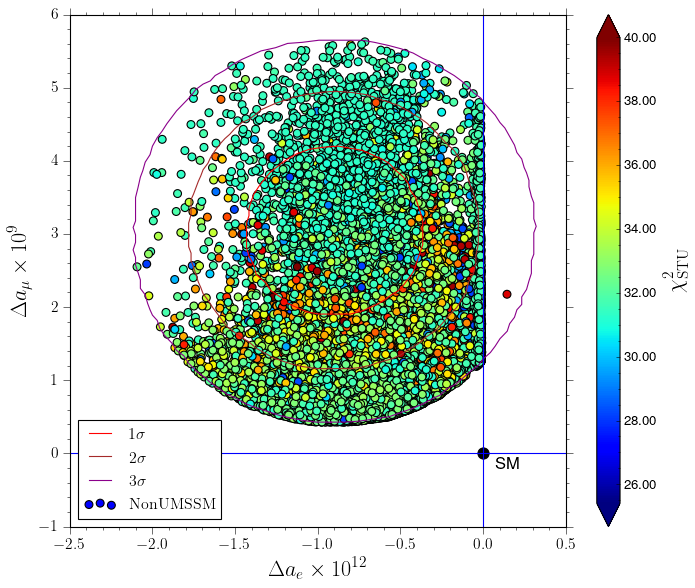

In [11]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')


df_sub_STU = df_sub_123sigma[  ((df_sub_123sigma["chi2STU"]) <= 40.) ] # Exclude all solution Wino content less than 40%

col = (df_sub_STU["chi2STU"])
sc1 = ax1.scatter(np.array(df_sub_STU["DAEL"])*10**12, np.array(df_sub_STU["DAMU"])*10**9, c=col, cmap=cm, marker='o', s=50, label=r"$ {\rm\ NonUMSSM} $")

cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
#cbar1 = plt.colorbar(sc1, extend='both')

sc1 = ax1.scatter(np.array(0)*10**12, np.array(0)*10**9, c="black", marker='o', s=100)

sc1 = ax1.plot(np.array(G2_1sig["DAEL"]), np.array(G2_1sig["DAMU"]), c="red", label=r"$ {1 \sigma} $")
sc1 = ax1.plot(np.array(G2_2sig["DAEL"]), np.array(G2_2sig["DAMU"]), c="brown", label=r"$ {2 \sigma} $")
sc1 = ax1.plot(np.array(G2_3sig["DAEL"]), np.array(G2_3sig["DAMU"]), c="darkmagenta", label=r"$ {3 \sigma} $")

cbar1.set_label(r"$\displaystyle \chi^2_{\rm STU}$", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle \Delta a_e \times 10^{12} $ ", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle \Delta a_\mu \times 10^9 $ ", fontsize=20)

plt.axhline(y=0., color='b', linestyle='-')
plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([-2.5,0.5])
plt.ylim([-1.,6.])

#plt.xscale('log')
#plt.yscale('log')

plt.text(0.07, -0.2, "SM", fontsize=15)
#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='best',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/LeptonG2/Oblique_STU.png') # dpi = 300 # save the figure to file
#plt.close(fig)

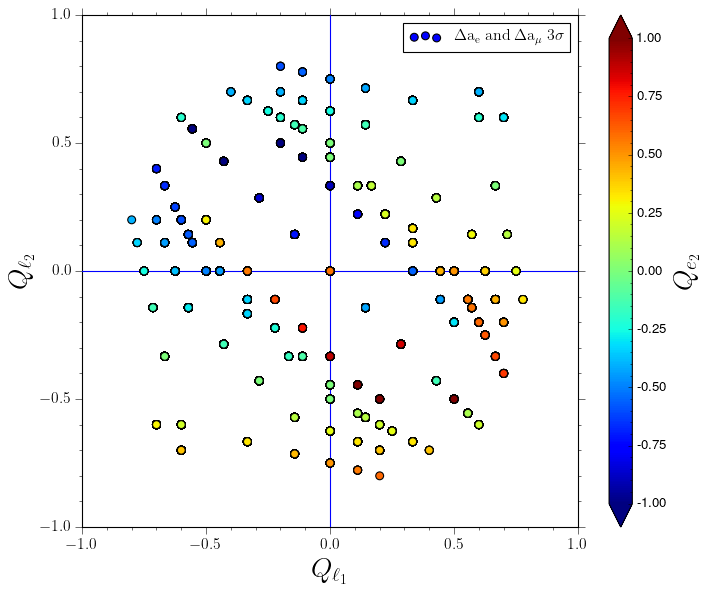

In [12]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')

col = (df_sub_123sigma["Qe2"])
sc1 = ax1.scatter(np.array(df_sub_123sigma["Ql1"]), np.array(df_sub_123sigma["Ql2"]), c=col, cmap=cm, marker='o', s=50, label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 3\sigma}$", zorder=50)

cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
#cbar1 = plt.colorbar(sc1, extend='both')


cbar1.set_label(r"$\displaystyle Q_{e_2} $", fontsize=25)
ax1 = plt.xlabel(r"$\displaystyle Q_{\ell_1} $ ", fontsize=25)
ax1 = plt.ylabel(r"$\displaystyle Q_{\ell_2} $ ", fontsize=25)

plt.axhline(y=0., color='b', linestyle='-', zorder=40)
plt.axvline(x=0., color='b', linestyle='-', zorder=40)

plt.xlim([-1.0,1.0])
plt.ylim([-1.,1.])

#plt.xscale('log')
#plt.yscale('log')

#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='best',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/LeptonG2/U1Charges_L1L2E2.png') # dpi = 300 # save the figure to file
#plt.close(fig)

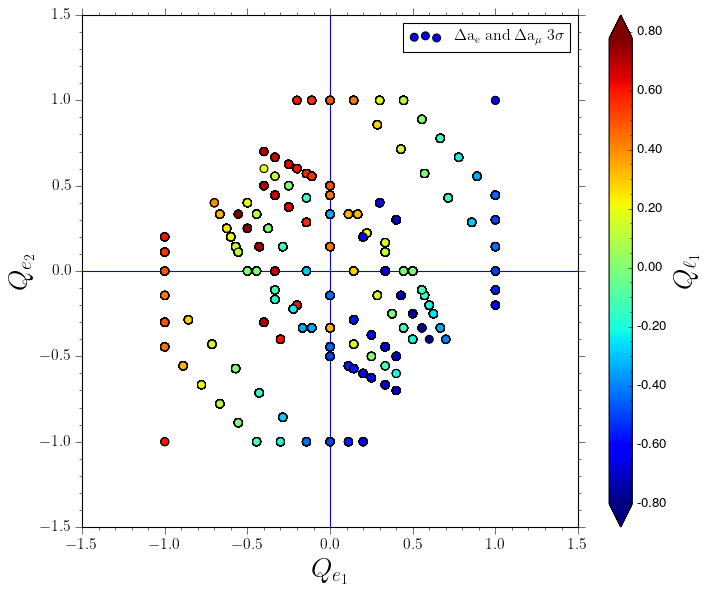

In [13]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')

col = (df_sub_123sigma["Ql1"])
sc1 = ax1.scatter(np.array(df_sub_123sigma["Qe1"]), np.array(df_sub_123sigma["Qe2"]), c=col, cmap=cm, marker='o', s=50, label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 3\sigma}$", zorder=50)

cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
#cbar1 = plt.colorbar(sc1, extend='both')


cbar1.set_label(r"$\displaystyle Q_{\ell_1} $", fontsize=25)
ax1 = plt.xlabel(r"$\displaystyle Q_{e_1} $ ", fontsize=25)
ax1 = plt.ylabel(r"$\displaystyle Q_{e_2} $ ", fontsize=25)

plt.axhline(y=0., color='b', linestyle='-', zorder=40)
plt.axvline(x=0., color='b', linestyle='-', zorder=40)

#plt.xlim([-1.0,1.0])
#plt.ylim([-1.,1.])

#plt.xscale('log')
#plt.yscale('log')

#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='best',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/LeptonG2/U1Charges_E1E2L1.png') # dpi = 300 # save the figure to file
#plt.close(fig)

In [ ]:
df_sub_123sigma_Chi1LSP = df_sub_123sigma[(df_sub_123sigma['WhoIsLSP'] == 1000022)]
df_sub_123sigma_Sv1LSP  = df_sub_123sigma[(df_sub_123sigma['WhoIsLSP'] == 1000012)]
df_sub_123sigma_Cha1LSP = df_sub_123sigma[(df_sub_123sigma['WhoIsLSP'] == 1000024)]
df_sub_123sigma_Se1LSP  = df_sub_123sigma[(df_sub_123sigma['WhoIsLSP'] == 1000011)]

pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')

#col = np.array(df_sub_DA["Tep"])
sc1 = ax1.scatter(np.array(df_sub_123sigma_Chi1LSP["DAEL"])*10**12, np.array(df_sub_123sigma_Chi1LSP["DAMU"])*10**9, c='cyan', marker='o', s=50, zorder=1,
                    label=r"$ {\rm\ \tilde{\chi}_1^0\ LSP}$")

#sc1 = ax1.scatter(np.array(df_sub_123sigma_Cha1LSP["DAEL"])*10**12, np.array(df_sub_123sigma_Cha1LSP["DAMU"])*10**9, c='lime', marker='s', s=50, zorder=2,
#                    label=r"$ {\rm\ \tilde{\chi}_1^\pm\ LSP}$")

#sc1 = ax1.scatter(np.array(df_sub_123sigma_Se1LSP["DAEL"])*10**12, np.array(df_sub_123sigma_Se1LSP["DAMU"])*10**9, c='cyan', marker='D', s=50, zorder=3,
#                    label=r"$ {\rm\ \tilde{e}_1^\pm\ LSP}$")

sc1 = ax1.scatter(np.array(df_sub_123sigma_Sv1LSP["DAEL"])*10**12, np.array(df_sub_123sigma_Sv1LSP["DAMU"])*10**9, c='magenta', marker='*', s=150, zorder=4,
                    label=r"$ {\rm\ \tilde{\nu}_1\ LSP}$")


#cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
#cbar1 = plt.colorbar(sc1, extend='both')

sc1 = ax1.scatter(np.array(0)*10**12, np.array(0)*10**9, c="black", marker='o', s=100)

sc1 = ax1.plot(np.array(G2_1sig["DAEL"]), np.array(G2_1sig["DAMU"]), c="red", label=r"$ {1 \sigma} $")
sc1 = ax1.plot(np.array(G2_2sig["DAEL"]), np.array(G2_2sig["DAMU"]), c="brown", label=r"$ {2 \sigma} $")
sc1 = ax1.plot(np.array(G2_3sig["DAEL"]), np.array(G2_3sig["DAMU"]), c="darkmagenta", label=r"$ {3 \sigma} $")

#cbar1.set_label(r"$\displaystyle T^\prime_e  {\rm\ [GeV]} $", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle \Delta a_e \times 10^{12} $ ", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle \Delta a_\mu \times 10^9 $ ", fontsize=20)

plt.axhline(y=0., color='b', linestyle='-')
plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([-2.5,0.5])
plt.ylim([-1.,6.])

#plt.xscale('log')
#plt.yscale('log')

plt.text(0.07, -0.2, "SM", fontsize=15)
#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='upper left',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/LeptonG2/WhoIsLSP.png')   # save the figure to file
#plt.close(fig)

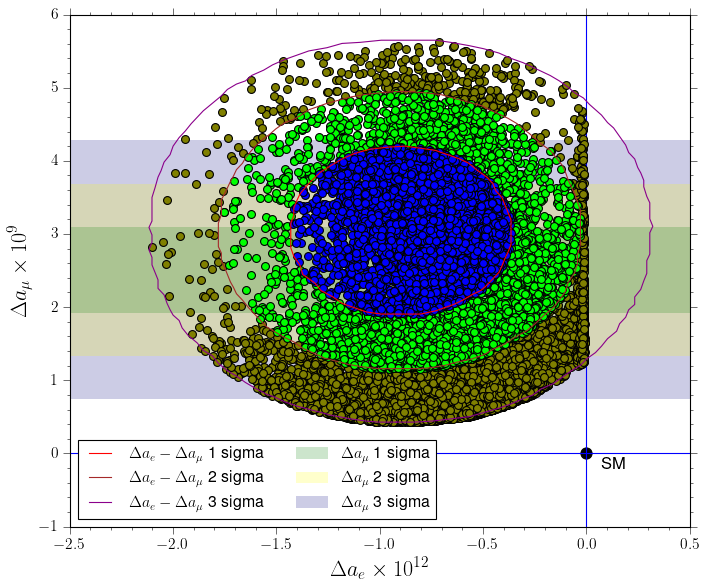

In [95]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')

#col = np.array(df_sub_DA["Tep"])
sc1 = ax1.scatter(np.array(df_sub_1sigma["DAEL"])*10**12, np.array(df_sub_1sigma["DAMU"])*10**9, c='blue', marker='o', s=50, zorder=5) # label=r"$ #{\rm\ NonUMSSM}$"
sc1 = ax1.scatter(np.array(df_sub_2sigma["DAEL"])*10**12, np.array(df_sub_2sigma["DAMU"])*10**9, c='lime', marker='o', s=50, zorder=4)  # label=r"$ {\rm\ NonUMSSM} $"
sc1 = ax1.scatter(np.array(df_sub_3sigma["DAEL"])*10**12, np.array(df_sub_3sigma["DAMU"])*10**9, c='olive', marker='o', s=50, zorder=3) # label=r"$ {\rm\ NonUMSSM} $"

#cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
#cbar1 = plt.colorbar(sc1, extend='both')

sc1 = ax1.scatter(np.array(0)*10**12, np.array(0)*10**9, c="black", marker='o', s=100)

sc1 = ax1.plot(np.array(G2_1sig["DAEL"]), np.array(G2_1sig["DAMU"]), c="red", label=r"$ \Delta a_e - \Delta a_{\mu}$ 1 sigma", zorder= 10)
sc1 = ax1.plot(np.array(G2_2sig["DAEL"]), np.array(G2_2sig["DAMU"]), c="brown", label=r"$ \Delta a_e - \Delta a_{\mu}$ 2 sigma", zorder=10)
sc1 = ax1.plot(np.array(G2_3sig["DAEL"]), np.array(G2_3sig["DAMU"]), c="darkmagenta", label=r"$ \Delta a_e - \Delta a_{\mu}$ 3 sigma", zorder=10)


ax1.axhspan(2.51 - 0.59, 2.51 + 0.59,color='green',fill=True,alpha=.2,linewidth=0.0,zorder=2, 
            label=r"$ \Delta a_{\mu}$ 1 sigma")
ax1.axhspan(2.51 - 0.59*2, 2.51 + 0.59*2,color='yellow',fill=True,alpha=.2,linewidth=0.0,zorder=1,
            label=r"$ \Delta a_{\mu}$ 2 sigma")
ax1.axhspan(2.51 - 0.59*3, 2.51 + 0.59*3,color='navy',fill=True,alpha=.2,linewidth=0.0,zorder=0,
            label=r"$ \Delta a_{\mu}$ 3 sigma")


#cbar1.set_label(r"$\displaystyle T^\prime_e  {\rm\ [GeV]} $", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle \Delta a_e \times 10^{12} $ ", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle \Delta a_\mu \times 10^9 $ ", fontsize=20)

plt.axhline(y=0., color='b', linestyle='-')
plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([-2.5,0.5])
plt.ylim([-1.,6.])

#plt.xscale('log')
#plt.yscale('log')

plt.text(0.07, -0.2, "SM", fontsize=15)
#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='lower left',frameon=True, ncol = 2)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/LeptonG2/DAMUvsDAEL.png')   # save the figure to file
#plt.close(fig)

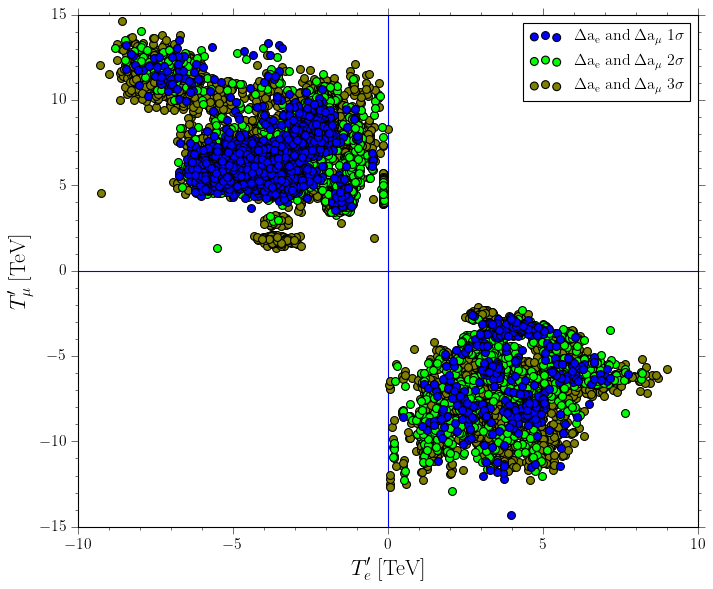

In [56]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')

#col = np.array(df_sub_DA["Tep"])
sc1 = ax1.scatter(np.array(df_sub_1sigma["Tep"])/1000., np.array(df_sub_1sigma["Tmup"])/1000., c='blue', marker='o', s=50, zorder=5, 
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 1\sigma}$")
sc1 = ax1.scatter(np.array(df_sub_2sigma["Tep"])/1000., np.array(df_sub_2sigma["Tmup"])/1000., c='lime', marker='o',  s=50, zorder=4, 
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 2\sigma}$")
sc1 = ax1.scatter(np.array(df_sub_3sigma["Tep"])/1000., np.array(df_sub_3sigma["Tmup"])/1000., c='olive', marker='o', s=50, zorder=3, 
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 3\sigma}$")

#cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
#cbar1 = plt.colorbar(sc1, extend='both')

#sc1 = ax1.scatter(np.array(0)*10**12, np.array(0)*10**9, c="black", marker='o', s=100)

#sc1 = ax1.plot(np.array(G2_1sig["DAEL"]), np.array(G2_1sig["DAMU"]), c="red", label=r"$ {1 \sigma} $")
#sc1 = ax1.plot(np.array(G2_2sig["DAEL"]), np.array(G2_2sig["DAMU"]), c="brown", label=r"$ {2 \sigma} $")
#sc1 = ax1.plot(np.array(G2_3sig["DAEL"]), np.array(G2_3sig["DAMU"]), c="darkmagenta", label=r"$ {3 \sigma} $")

#cbar1.set_label(r"$\displaystyle T^\prime_e  {\rm\ [GeV]} $", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle T^\prime_e  {\rm\ [TeV]} $", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle T^\prime_\mu  {\rm\ [TeV]} $", fontsize=20)

plt.axhline(y=0., color='b', linestyle='-')
plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([-10.,10.])
plt.ylim([-15,15.])

#plt.xscale('log')
#plt.yscale('log')

#plt.text(0.07, -0.2, "SM", fontsize=15)
#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='upper right',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/LeptonG2/TepvsTmup.png')   # save the figure to file
#plt.close(fig)

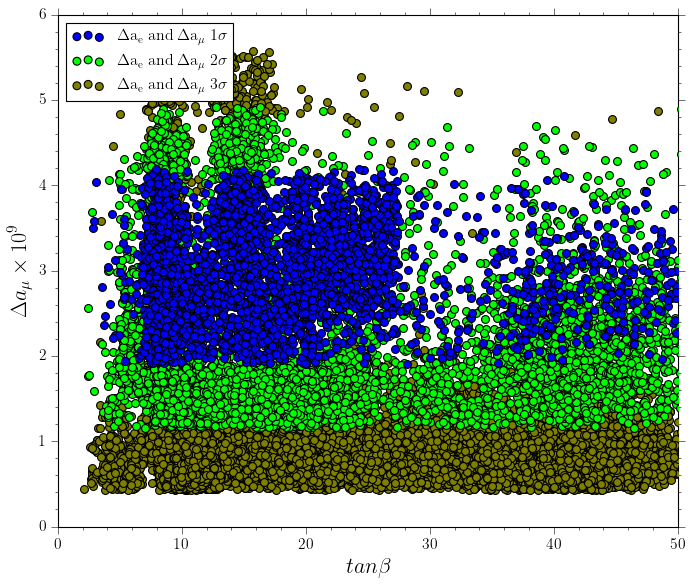

In [16]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')

#col = np.array(df_sub_DA["Tep"])
sc1 = ax1.scatter(np.array(df_sub_1sigma["TanBeta"]), np.array(df_sub_1sigma["DAMU"])*10**9, c='blue', marker='o', s=50, zorder=5,
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 1\sigma}$")
sc1 = ax1.scatter(np.array(df_sub_2sigma["TanBeta"]), np.array(df_sub_2sigma["DAMU"])*10**9, c='lime', marker='o', s=50, zorder=4,
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 2\sigma}$")
sc1 = ax1.scatter(np.array(df_sub_3sigma["TanBeta"]), np.array(df_sub_3sigma["DAMU"])*10**9, c='olive', marker='o', s=50, zorder=3,
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 3\sigma}$")

#cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
#cbar1 = plt.colorbar(sc1, extend='both')

#sc1 = ax1.scatter(np.array(0)*10**12, np.array(0)*10**9, c="black", marker='o', s=100)

#sc1 = ax1.plot(np.array(G2_1sig["DAEL"]), np.array(G2_1sig["DAMU"]), c="red", label=r"$ {1 \sigma} $")
#sc1 = ax1.plot(np.array(G2_2sig["DAEL"]), np.array(G2_2sig["DAMU"]), c="brown", label=r"$ {2 \sigma} $")
#sc1 = ax1.plot(np.array(G2_3sig["DAEL"]), np.array(G2_3sig["DAMU"]), c="darkmagenta", label=r"$ {3 \sigma} $")

#cbar1.set_label(r"$\displaystyle T^\prime_e  {\rm\ [GeV]} $", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle tan \beta $ ", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle \Delta a_\mu \times 10^9 $ ", fontsize=20)

#plt.axhline(y=0., color='b', linestyle='-')
#plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([0.,50.])
plt.ylim([0.,6.])

#plt.xscale('log')
#plt.yscale('log')

#plt.text(0.07, -0.2, "SM", fontsize=15)
#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='upper left',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/LeptonG2/DAMUvsTanBeta.png')   # save the figure to file
#plt.close(fig)

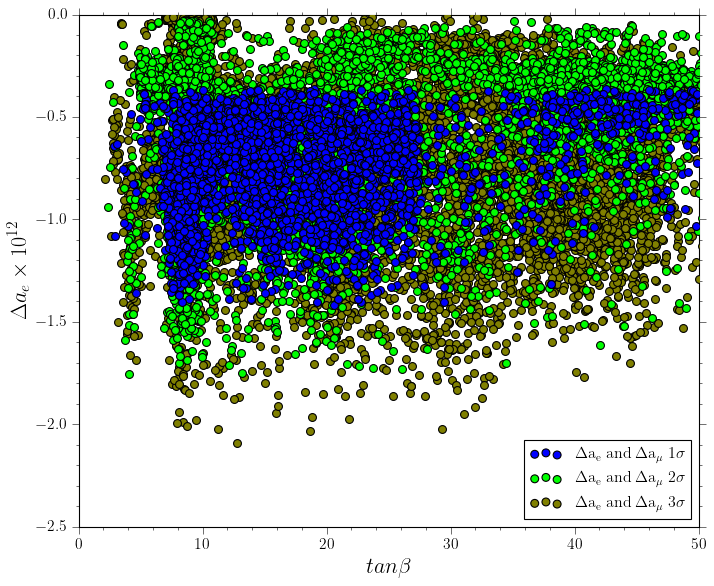

In [17]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')

#col = np.array(df_sub_DA["Tep"])
sc1 = ax1.scatter(np.array(df_sub_1sigma["TanBeta"]), np.array(df_sub_1sigma["DAEL"])*10**12, c='blue', marker='o', s=50, zorder=5,
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 1\sigma}$")
sc1 = ax1.scatter(np.array(df_sub_2sigma["TanBeta"]), np.array(df_sub_2sigma["DAEL"])*10**12, c='lime', marker='o', s=50, zorder=4,
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 2\sigma}$")
sc1 = ax1.scatter(np.array(df_sub_3sigma["TanBeta"]), np.array(df_sub_3sigma["DAEL"])*10**12, c='olive', marker='o', s=50, zorder=3,
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 3\sigma}$")

#cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
#cbar1 = plt.colorbar(sc1, extend='both')

#sc1 = ax1.scatter(np.array(0)*10**12, np.array(0)*10**9, c="black", marker='o', s=100)

#sc1 = ax1.plot(np.array(G2_1sig["DAEL"]), np.array(G2_1sig["DAMU"]), c="red", label=r"$ {1 \sigma} $")
#sc1 = ax1.plot(np.array(G2_2sig["DAEL"]), np.array(G2_2sig["DAMU"]), c="brown", label=r"$ {2 \sigma} $")
#sc1 = ax1.plot(np.array(G2_3sig["DAEL"]), np.array(G2_3sig["DAMU"]), c="darkmagenta", label=r"$ {3 \sigma} $")

#cbar1.set_label(r"$\displaystyle T^\prime_e  {\rm\ [GeV]} $", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle tan \beta $ ", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle \Delta a_e \times 10^{12} $ ", fontsize=20)

#plt.axhline(y=0., color='b', linestyle='-')
#plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([0.,50.])
plt.ylim([-2.5,0.])

#plt.xscale('log')
#plt.yscale('log')

#plt.text(0.07, -0.2, "SM", fontsize=15)
#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='lower right',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/LeptonG2/DAELvsTanBeta.png')   # save the figure to file
#plt.close(fig)

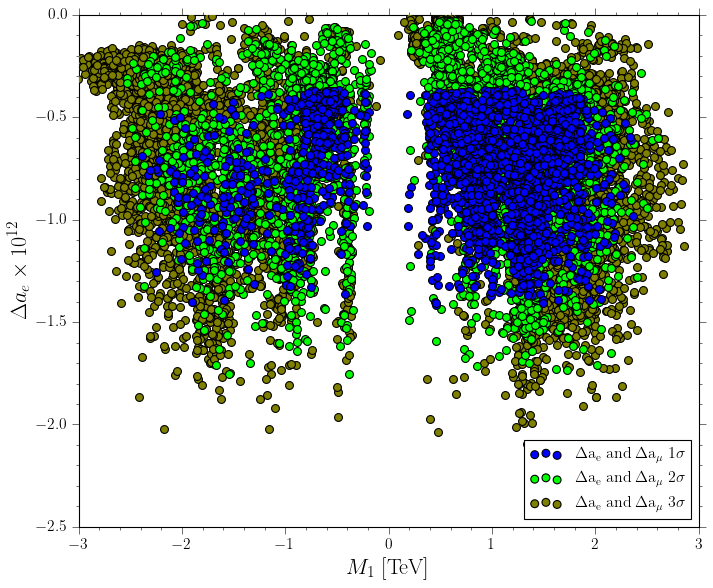

In [18]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')

#col = np.array(df_sub_DA["Tep"])
sc1 = ax1.scatter(np.array(df_sub_1sigma["M1"])/1000., np.array(df_sub_1sigma["DAEL"])*10**12, c='blue', marker='o', s=50, zorder=5,
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 1\sigma}$")
sc1 = ax1.scatter(np.array(df_sub_2sigma["M1"])/1000., np.array(df_sub_2sigma["DAEL"])*10**12, c='lime', marker='o', s=50, zorder=4,
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 2\sigma}$")
sc1 = ax1.scatter(np.array(df_sub_3sigma["M1"])/1000., np.array(df_sub_3sigma["DAEL"])*10**12, c='olive', marker='o', s=50, zorder=3,
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 3\sigma}$")

#cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
#cbar1 = plt.colorbar(sc1, extend='both')

#sc1 = ax1.scatter(np.array(0)*10**12, np.array(0)*10**9, c="black", marker='o', s=100)

#sc1 = ax1.plot(np.array(G2_1sig["DAEL"]), np.array(G2_1sig["DAMU"]), c="red", label=r"$ {1 \sigma} $")
#sc1 = ax1.plot(np.array(G2_2sig["DAEL"]), np.array(G2_2sig["DAMU"]), c="brown", label=r"$ {2 \sigma} $")
#sc1 = ax1.plot(np.array(G2_3sig["DAEL"]), np.array(G2_3sig["DAMU"]), c="darkmagenta", label=r"$ {3 \sigma} $")

#cbar1.set_label(r"$\displaystyle T^\prime_e  {\rm\ [GeV]} $", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle M_1 {\rm\ [TeV]} $  ", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle \Delta a_e \times 10^{12} $ ", fontsize=20)

#plt.axhline(y=0., color='b', linestyle='-')
#plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([-3.,3.])
plt.ylim([-2.5,0.])

#plt.xscale('log')
#plt.yscale('log')

#plt.text(0.07, -0.2, "SM", fontsize=15)
#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='lower right',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/LeptonG2/DAELvsM1.png')   # save the figure to file
#plt.close(fig)

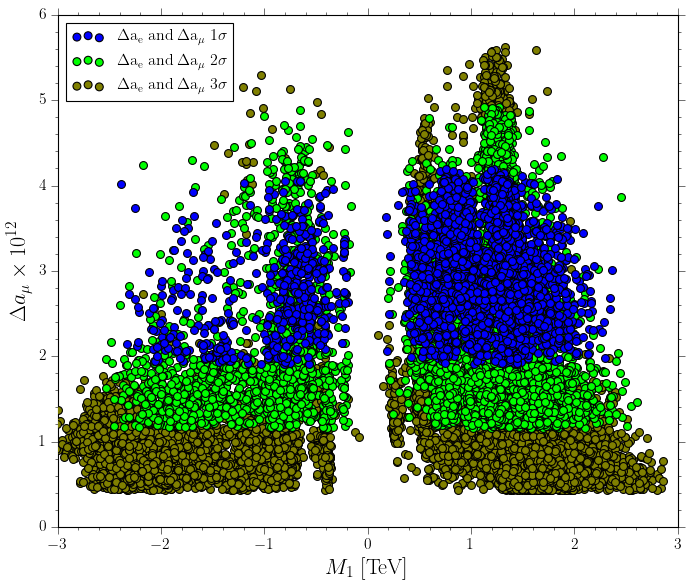

In [19]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')

#col = np.array(df_sub_DA["Tep"])
sc1 = ax1.scatter(np.array(df_sub_1sigma["M1"])/1000., np.array(df_sub_1sigma["DAMU"])*10**9, c='blue', marker='o', s=50, zorder=5,
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 1\sigma}$")
sc1 = ax1.scatter(np.array(df_sub_2sigma["M1"])/1000., np.array(df_sub_2sigma["DAMU"])*10**9, c='lime', marker='o', s=50, zorder=4,
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 2\sigma}$")
sc1 = ax1.scatter(np.array(df_sub_3sigma["M1"])/1000., np.array(df_sub_3sigma["DAMU"])*10**9, c='olive', marker='o', s=50, zorder=3,
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 3\sigma}$")

#cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
#cbar1 = plt.colorbar(sc1, extend='both')

#sc1 = ax1.scatter(np.array(0)*10**12, np.array(0)*10**9, c="black", marker='o', s=100)

#sc1 = ax1.plot(np.array(G2_1sig["DAEL"]), np.array(G2_1sig["DAMU"]), c="red", label=r"$ {1 \sigma} $")
#sc1 = ax1.plot(np.array(G2_2sig["DAEL"]), np.array(G2_2sig["DAMU"]), c="brown", label=r"$ {2 \sigma} $")
#sc1 = ax1.plot(np.array(G2_3sig["DAEL"]), np.array(G2_3sig["DAMU"]), c="darkmagenta", label=r"$ {3 \sigma} $")

#cbar1.set_label(r"$\displaystyle T^\prime_e  {\rm\ [GeV]} $", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle M_1 {\rm\ [TeV]} $  ", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle \Delta a_\mu \times 10^{12} $ ", fontsize=20)

#plt.axhline(y=0., color='b', linestyle='-')
#plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([-3.,3.])
plt.ylim([0., 6.])

#plt.xscale('log')
#plt.yscale('log')

#plt.text(0.07, -0.2, "SM", fontsize=15)
#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='upper left',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/LeptonG2/DAMUvsM1.png')   # save the figure to file
#plt.close(fig)

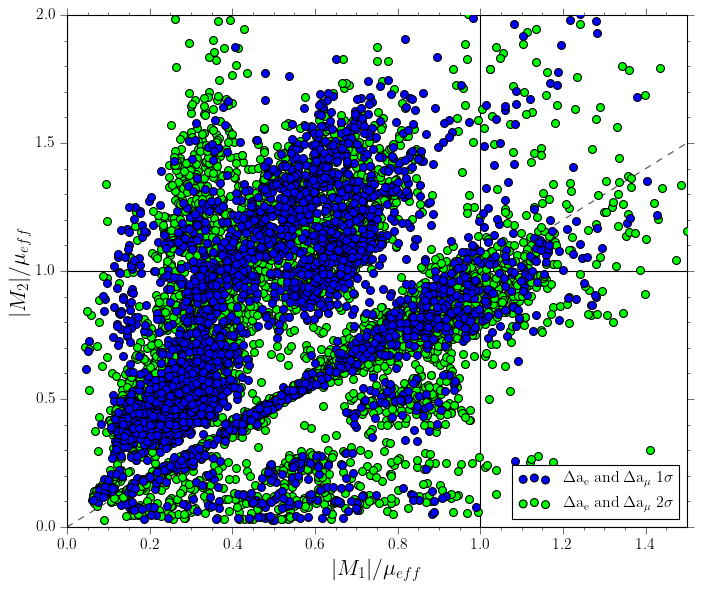

In [20]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')

#col = np.array(df_sub_DA["Tep"])

mueff_1sigma = (np.array(df_sub_1sigma["vS"]*df_sub_1sigma["Lambda"])/sqrt(2))
mueff_2sigma = (np.array(df_sub_2sigma["vS"]*df_sub_2sigma["Lambda"])/sqrt(2))
mueff_3sigma = (np.array(df_sub_3sigma["vS"]*df_sub_3sigma["Lambda"])/sqrt(2))

ax1.plot([-3, 3], [-3, 3], ls="--", c=".3")

sc1 = ax1.scatter(np.array(abs(df_sub_1sigma["M1"]))/mueff_1sigma, np.array(abs(df_sub_1sigma["M2"]))/mueff_1sigma, c='blue', marker='o', s=50, zorder=5, 
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 1\sigma}$")
sc1 = ax1.scatter(np.array(abs(df_sub_2sigma["M1"]))/mueff_2sigma, np.array(abs(df_sub_2sigma["M2"]))/mueff_2sigma, c='lime', marker='o',  s=50, zorder=4, 
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 2\sigma}$")
#sc1 = ax1.scatter(np.array(abs(df_sub_3sigma["M1"]))/mueff_3sigma, np.array(abs(df_sub_3sigma["M2"]))//mueff_3sigma, c='olive', marker='o', s=50, zorder=3, 
#                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 3\sigma}$")

#cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
#cbar1 = plt.colorbar(sc1, extend='both')

#sc1 = ax1.scatter(np.array(0)*10**12, np.array(0)*10**9, c="black", marker='o', s=100)

#sc1 = ax1.plot(np.array(G2_1sig["DAEL"]), np.array(G2_1sig["DAMU"]), c="red", label=r"$ {1 \sigma} $")
#sc1 = ax1.plot(np.array(G2_2sig["DAEL"]), np.array(G2_2sig["DAMU"]), c="brown", label=r"$ {2 \sigma} $")
#sc1 = ax1.plot(np.array(G2_3sig["DAEL"]), np.array(G2_3sig["DAMU"]), c="darkmagenta", label=r"$ {3 \sigma} $")


#cbar1.set_label(r"$\displaystyle T^\prime_e  {\rm\ [GeV]} $", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle \vert M_1 \vert / \mu_{eff} $", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle \vert M_2 \vert / \mu_{eff} $", fontsize=20)

plt.axhline(y=0., color='b', linestyle='-')
plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([0.,1.5])
plt.ylim([0., 2.])

#plt.xscale('log')
#plt.yscale('log')

plt.axhline(y=1., color='black', linestyle='-')
plt.axvline(x=1., color='black', linestyle='-')


#plt.text(0.07, -0.2, "SM", fontsize=15)
#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='lower right',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/LeptonG2/SoftRatios.png')   # save the figure to file
#plt.close(fig)

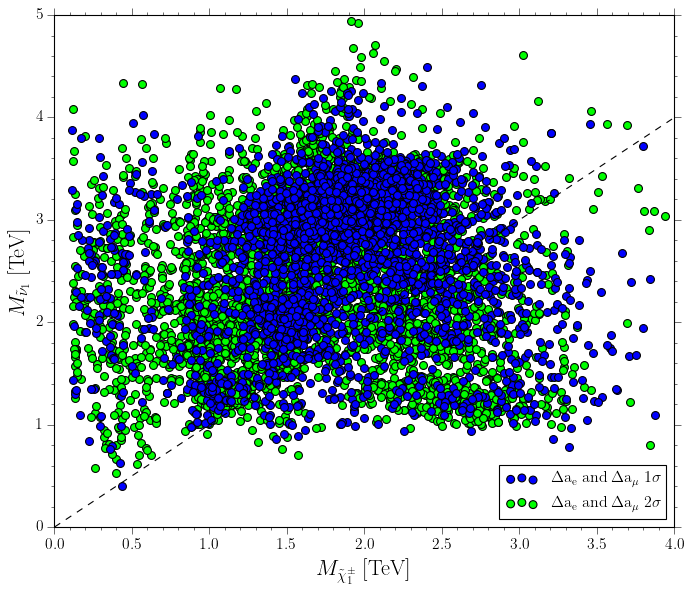

In [68]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')

#col = np.array(df_sub_DA["Tep"])


ax1.plot([-5, 5], [-5, 5], ls="--", c="black", zorder=50)

sc1 = ax1.scatter(np.array(df_sub_1sigma["Cha1"])/1000., np.array(abs(df_sub_1sigma["Sv1"]))/1000., c='blue', marker='o', s=50, zorder=5, 
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 1\sigma}$")
sc1 = ax1.scatter(np.array(df_sub_2sigma["Cha1"])/1000., np.array(abs(df_sub_2sigma["Sv1"]))/1000., c='lime', marker='o',  s=50, zorder=4, 
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 2\sigma}$")
#sc1 = ax1.scatter(np.array(abs(df_sub_3sigma["M1"]))/mueff_3sigma, np.array(abs(df_sub_3sigma["M2"]))//mueff_3sigma, c='olive', marker='o', s=50, zorder=3, 
#                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 3\sigma}$")

#cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
#cbar1 = plt.colorbar(sc1, extend='both')

#sc1 = ax1.scatter(np.array(0)*10**12, np.array(0)*10**9, c="black", marker='o', s=100)

#sc1 = ax1.plot(np.array(G2_1sig["DAEL"]), np.array(G2_1sig["DAMU"]), c="red", label=r"$ {1 \sigma} $")
#sc1 = ax1.plot(np.array(G2_2sig["DAEL"]), np.array(G2_2sig["DAMU"]), c="brown", label=r"$ {2 \sigma} $")
#sc1 = ax1.plot(np.array(G2_3sig["DAEL"]), np.array(G2_3sig["DAMU"]), c="darkmagenta", label=r"$ {3 \sigma} $")


#cbar1.set_label(r"$\displaystyle T^\prime_e  {\rm\ [GeV]} $", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle M_{\tilde{\chi}_1^\pm} {\rm\ [TeV]}$", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle M_{\tilde{\nu}_1} {\rm\ [TeV]}$", fontsize=20)

#plt.axhline(y=0., color='b', linestyle='-')
#plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([0., 4.])
plt.ylim([0., 5.])

#plt.xscale('log')
#plt.yscale('log')

#plt.axhline(y=1., color='black', linestyle='-')
#plt.axvline(x=1., color='black', linestyle='-')


#plt.text(0.07, -0.2, "SM", fontsize=15)
#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='lower right',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/LeptonG2/Cha1vsSv1.png')   # save the figure to file
#plt.close(fig)

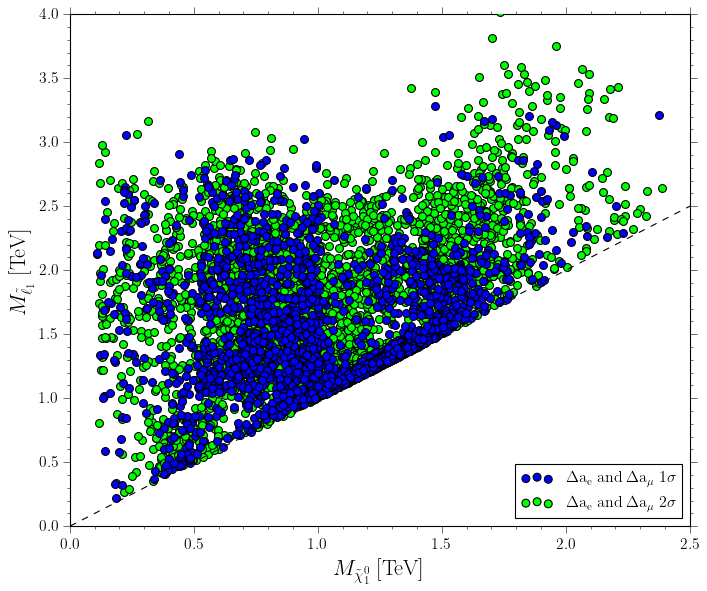

In [71]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')

#col = np.array(df_sub_DA["Tep"])

ax1.plot([-5, 5], [-5, 5], ls="--", c="black", zorder=50)

sc1 = ax1.scatter(np.array(df_sub_1sigma["Chi1"])/1000., np.array(abs(df_sub_1sigma["Se1"]))/1000., c='blue', marker='o', s=50, zorder=5, 
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 1\sigma}$")
sc1 = ax1.scatter(np.array(df_sub_2sigma["Chi1"])/1000., np.array(abs(df_sub_2sigma["Se1"]))/1000., c='lime', marker='o',  s=50, zorder=4, 
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 2\sigma}$")
#sc1 = ax1.scatter(np.array(abs(df_sub_3sigma["M1"]))/mueff_3sigma, np.array(abs(df_sub_3sigma["M2"]))//mueff_3sigma, c='olive', marker='o', s=50, zorder=3, 
#                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 3\sigma}$")

#cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
#cbar1 = plt.colorbar(sc1, extend='both')

#sc1 = ax1.scatter(np.array(0)*10**12, np.array(0)*10**9, c="black", marker='o', s=100)

#sc1 = ax1.plot(np.array(G2_1sig["DAEL"]), np.array(G2_1sig["DAMU"]), c="red", label=r"$ {1 \sigma} $")
#sc1 = ax1.plot(np.array(G2_2sig["DAEL"]), np.array(G2_2sig["DAMU"]), c="brown", label=r"$ {2 \sigma} $")
#sc1 = ax1.plot(np.array(G2_3sig["DAEL"]), np.array(G2_3sig["DAMU"]), c="darkmagenta", label=r"$ {3 \sigma} $")


#cbar1.set_label(r"$\displaystyle T^\prime_e  {\rm\ [GeV]} $", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle M_{\tilde{\chi}_1^0} {\rm\ [TeV]}$", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle M_{\tilde{\ell}_1} {\rm\ [TeV]}$", fontsize=20)

#plt.axhline(y=0., color='b', linestyle='-')
#plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([0., 2.5])
plt.ylim([0., 4.])
#plt.xscale('log')
#plt.yscale('log')

#plt.axhline(y=1., color='black', linestyle='-')
#plt.axvline(x=1., color='black', linestyle='-')


#plt.text(0.07, -0.2, "SM", fontsize=15)
#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='lower right',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/LeptonG2/Chi1vsSe1.png')   # save the figure to file
#plt.close(fig)

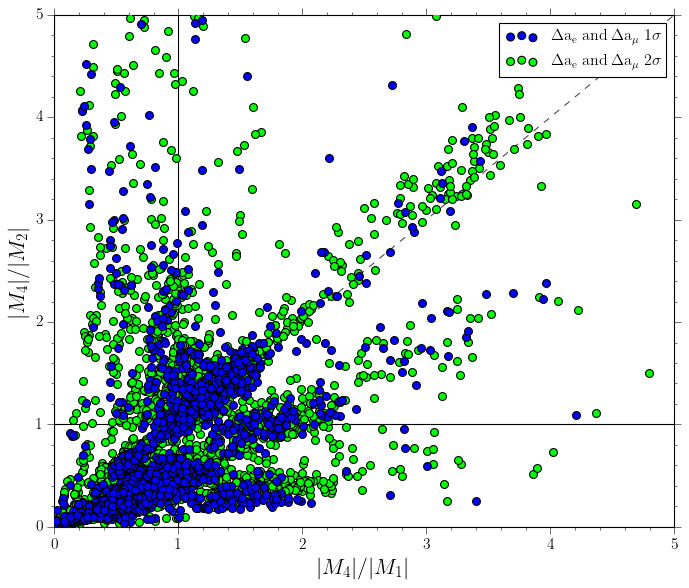

In [23]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')

#col = np.array(df_sub_DA["Tep"])

#mueff_1sigma = (np.array(df_sub_1sigma["vS"]*df_sub_1sigma["Lambda"])/sqrt(2))
#mueff_2sigma = (np.array(df_sub_2sigma["vS"]*df_sub_2sigma["Lambda"])/sqrt(2))
#mueff_3sigma = (np.array(df_sub_3sigma["vS"]*df_sub_3sigma["Lambda"])/sqrt(2))

ax1.plot([-5, 5], [-5, 5], ls="--", c=".3")

sc1 = ax1.scatter(np.array(abs(df_sub_1sigma["M4"]))/np.array(abs(df_sub_1sigma["M1"])), np.array(abs(df_sub_1sigma["M4"]))/np.array(abs(df_sub_1sigma["M2"])), c='blue', marker='o', s=50, zorder=5, 
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 1\sigma}$")
sc1 = ax1.scatter(np.array(abs(df_sub_2sigma["M4"]))/np.array(abs(df_sub_2sigma["M1"])), np.array(abs(df_sub_2sigma["M4"]))/np.array(abs(df_sub_2sigma["M2"])), c='lime', marker='o',  s=50, zorder=4, 
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 2\sigma}$")
#sc1 = ax1.scatter(np.array(abs(df_sub_3sigma["M1"]))/mueff_3sigma, np.array(abs(df_sub_3sigma["M2"]))//mueff_3sigma, c='olive', marker='o', s=50, zorder=3, 
#                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 3\sigma}$")

#cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
#cbar1 = plt.colorbar(sc1, extend='both')

#sc1 = ax1.scatter(np.array(0)*10**12, np.array(0)*10**9, c="black", marker='o', s=100)

#sc1 = ax1.plot(np.array(G2_1sig["DAEL"]), np.array(G2_1sig["DAMU"]), c="red", label=r"$ {1 \sigma} $")
#sc1 = ax1.plot(np.array(G2_2sig["DAEL"]), np.array(G2_2sig["DAMU"]), c="brown", label=r"$ {2 \sigma} $")
#sc1 = ax1.plot(np.array(G2_3sig["DAEL"]), np.array(G2_3sig["DAMU"]), c="darkmagenta", label=r"$ {3 \sigma} $")


#cbar1.set_label(r"$\displaystyle T^\prime_e  {\rm\ [GeV]} $", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle \vert M_4 \vert / \vert M_1 \vert $", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle \vert M_4 \vert / \vert M_2 \vert $", fontsize=20)

plt.axhline(y=0., color='b', linestyle='-')
plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([0.,5.])
plt.ylim([0.,5.])

#plt.xscale('log')
#plt.yscale('log')

plt.axhline(y=1., color='black', linestyle='-')
plt.axvline(x=1., color='black', linestyle='-')


#plt.text(0.07, -0.2, "SM", fontsize=15)
#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='upper right',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/LeptonG2/SoftRatios_II.png')   # save the figure to file
#plt.close(fig)

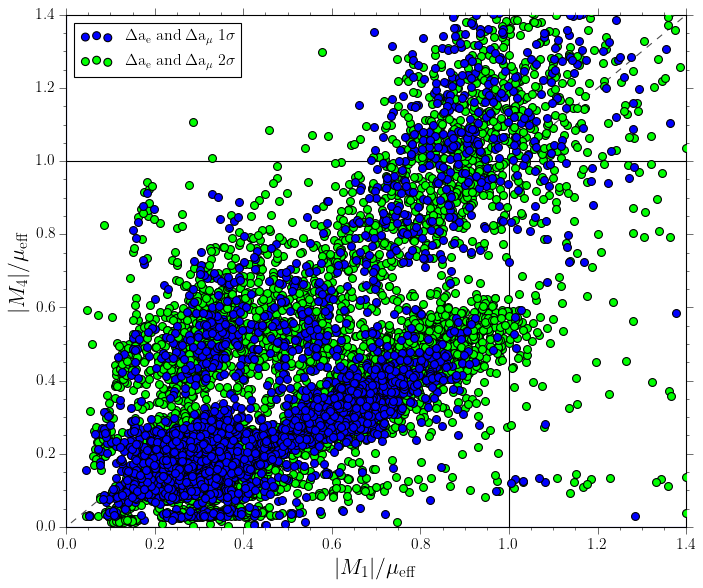

In [24]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')

#col = np.array(df_sub_DA["Tep"])

mueff_1sigma = (np.array(df_sub_1sigma["vS"]*df_sub_1sigma["Lambda"])/sqrt(2))
mueff_2sigma = (np.array(df_sub_2sigma["vS"]*df_sub_2sigma["Lambda"])/sqrt(2))
mueff_3sigma = (np.array(df_sub_3sigma["vS"]*df_sub_3sigma["Lambda"])/sqrt(2))

ax1.plot([-3, 3], [-3, 3], ls="--", c=".3")

sc1 = ax1.scatter(np.array(abs(df_sub_1sigma["M1"]))/mueff_1sigma, np.array(abs(df_sub_1sigma["M4"]))/mueff_1sigma, c='blue', marker='o', s=50, zorder=5, 
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 1\sigma}$")
sc1 = ax1.scatter(np.array(abs(df_sub_2sigma["M1"]))/mueff_2sigma, np.array(abs(df_sub_2sigma["M4"]))/mueff_2sigma, c='lime', marker='o',  s=50, zorder=4, 
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 2\sigma}$")
#sc1 = ax1.scatter(np.array(abs(df_sub_3sigma["M1"]))/mueff_3sigma, np.array(abs(df_sub_3sigma["M2"]))//mueff_3sigma, c='olive', marker='o', s=50, zorder=3, 
#                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 3\sigma}$")

#cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
#cbar1 = plt.colorbar(sc1, extend='both')

#sc1 = ax1.scatter(np.array(0)*10**12, np.array(0)*10**9, c="black", marker='o', s=100)

#sc1 = ax1.plot(np.array(G2_1sig["DAEL"]), np.array(G2_1sig["DAMU"]), c="red", label=r"$ {1 \sigma} $")
#sc1 = ax1.plot(np.array(G2_2sig["DAEL"]), np.array(G2_2sig["DAMU"]), c="brown", label=r"$ {2 \sigma} $")
#sc1 = ax1.plot(np.array(G2_3sig["DAEL"]), np.array(G2_3sig["DAMU"]), c="darkmagenta", label=r"$ {3 \sigma} $")


#cbar1.set_label(r"$\displaystyle T^\prime_e  {\rm\ [GeV]} $", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle \vert M_1 \vert / \mu_{\rm eff} $", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle \vert M_4 \vert / \mu_{\rm eff} $", fontsize=20)

plt.axhline(y=0., color='b', linestyle='-')
plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([0., 1.4])
plt.ylim([0., 1.4])

#plt.xscale('log')
#plt.yscale('log')

plt.axhline(y=1., color='black', linestyle='-')
plt.axvline(x=1., color='black', linestyle='-')


#plt.text(0.07, -0.2, "SM", fontsize=15)
#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='upper left',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/LeptonG2/SoftRatios_III.png')   # save the figure to file
#plt.close(fig)

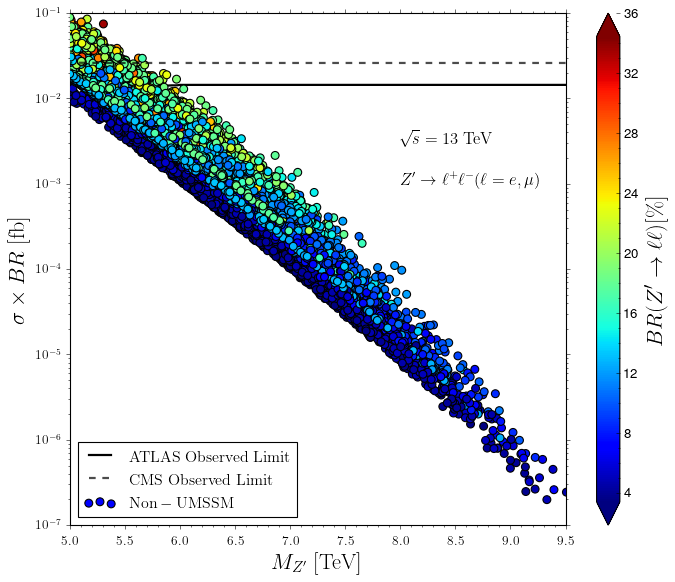

In [112]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)

cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')
col = np.array(df["BRZptoll"])*100


sc1 = ax1.scatter(np.array(df["MZp"])/1000., np.array(df["xsecpptoZp"]*1000*df["BRZptoll"]), 
                  c=col, cmap=cm, marker=".", zorder=50,label=r" $\rm {Non-UMSSM} $ ", s=200)

cbar1 = plt.colorbar(sc1, format = "%.0f", extend="both")
cbar1.set_label(r"$\displaystyle BR(Z^\prime \to \ell \ell) [\%] $ ", fontsize=20)

#sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width0/1000., observedxsection13TeVZpll139fb_xsec_width0,label=r"$ {\rm\ ATLAS\ Observed\ Limit\ \Gamma/M = 0} $",color='black', linewidth=2.0, zorder=30,alpha=0.7)
#sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width1over2/1000., observedxsection13TeVZpll139fb_xsec_width1over2,label=r"$ {\rm\ ATLAS\ Observed\ Limit\ \Gamma/M = 0.5 \%} $",color='blue', linewidth=2.0, zorder=20,alpha=0.7)
sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width1point2/1000., observedxsection13TeVZpll139fb_xsec_width1point2,label=r"$ {\rm\ ATLAS\ Observed\ Limit} $",color='black', linewidth=2.0, zorder=35,alpha=1.0)
    
    
    
#sc1 = ax1.plot((Zptoll_ObservedCMS_width06["MZp"])/1000., Zptoll_ObservedCMS_width06["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 0.6 \%} $",color='black', 
#               linewidth=2.0, zorder=35,alpha=0.7, linestyle="dashed")
sc1 = ax1.plot((Zptoll_ObservedCMS_width3["MZp"])/1000., Zptoll_ObservedCMS_width3["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit} $",color='black', 
               linewidth=2.0, zorder=55,alpha=0.7, linestyle="dashed")
#sc1 = ax1.plot((Zptoll_ObservedCMS_width5["MZp"])/1000., Zptoll_ObservedCMS_width5["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 5 \%} $",color='tab:green', 
#               linewidth=2.0, zorder=33,alpha=0.7, linestyle="dashed")
#sc1 = ax1.plot((Zptoll_ObservedCMS_width10["MZp"])/1000., Zptoll_ObservedCMS_width10["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 10 \%} $",color='gold', 
#               linewidth=2.0, zorder=32,alpha=0.7, linestyle="dashed")      
    
ax1.text(8.0, 3e-3, r"$\displaystyle \sqrt{s} = 13 {\rm\ TeV}$", size=15)
ax1.text(8.0, 1e-3, r"$\displaystyle Z^\prime \to \ell^+ \ell^- (\ell = e, \mu) $ ", size=15)
xmin = 5.0
xmax = 9.5
ymin = 1e-7
ymax = 1e-1
ax1.axis([xmin,xmax,ymin,ymax])
plt.xlabel(r"$\displaystyle M_{Z^\prime} {\rm\ [TeV]}$", fontsize=20)
plt.ylabel(r"$\displaystyle \sigma \times BR {\rm\ [fb]}$", fontsize=20)
ax1.xaxis.set_major_locator(MultipleLocator(0.5))
ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
#ax1.yaxis.set_major_locator(MultipleLocator(5))
#ax1.yaxis.set_minor_locator(MultipleLocator(1))
plt.yscale('log')
# Set both ticks to be outside
ax1.tick_params(which='both', direction='out')
#plt.legend(loc='best',frameon=True)
leg = plt.legend(loc='lower left',frameon=True)
leg.set_zorder(100)
fig.savefig("/Users/oozdal/Dropbox/MagMoment/Results/ZprimeCollider/Zptoll_limit_withBR_139fb.png",dpi = 300)   # save the figure to file
#plt.close(fig)

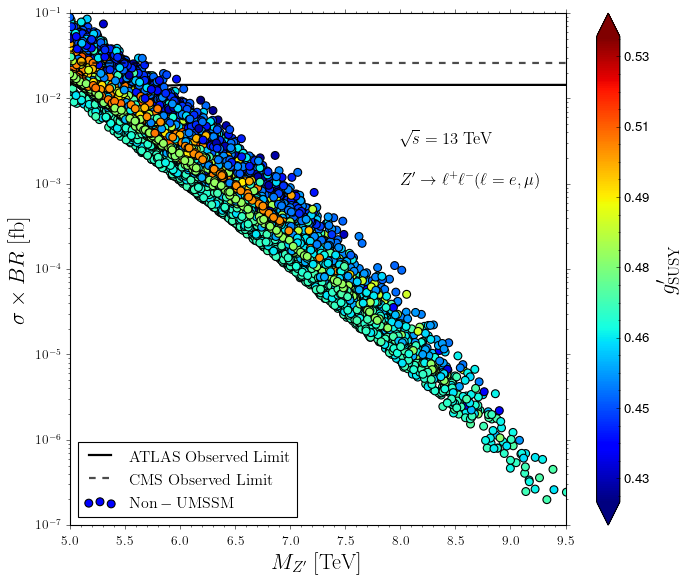

In [114]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)

cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')
col = np.array(df["gpSUSY"])

sc1 = ax1.scatter(np.array(df["MZp"])/1000., np.array(df["xsecpptoZp"]*1000*df["BRZptoll"]), 
                  c=col, cmap=cm, marker=".", zorder=50,label=r" $\rm {Non-UMSSM} $ ", s=200)

cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
cbar1.set_label(r"$\displaystyle g^\prime_{\rm SUSY} $ ", fontsize=20)

#sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width0/1000., observedxsection13TeVZpll139fb_xsec_width0,label=r"$ {\rm\ ATLAS\ Observed\ Limit\ \Gamma/M = 0} $",color='black', linewidth=2.0, zorder=30,alpha=0.7)
#sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width1over2/1000., observedxsection13TeVZpll139fb_xsec_width1over2,label=r"$ {\rm\ ATLAS\ Observed\ Limit\ \Gamma/M = 0.5 \%} $",color='blue', linewidth=2.0, zorder=20,alpha=0.7)
sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width1point2/1000., observedxsection13TeVZpll139fb_xsec_width1point2,label=r"$ {\rm\ ATLAS\ Observed\ Limit} $",color='black', linewidth=2.0, zorder=35,alpha=1.0)
    

#sc1 = ax1.plot((Zptoll_ObservedCMS_width06["MZp"])/1000., Zptoll_ObservedCMS_width06["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 0.6 \%} $",color='black', 
#               linewidth=2.0, zorder=35,alpha=0.7, linestyle="dashed")
sc1 = ax1.plot((Zptoll_ObservedCMS_width3["MZp"])/1000., Zptoll_ObservedCMS_width3["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit} $",color='black', 
               linewidth=2.0, zorder=55,alpha=0.7, linestyle="dashed")
#sc1 = ax1.plot((Zptoll_ObservedCMS_width5["MZp"])/1000., Zptoll_ObservedCMS_width5["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 5 \%} $",color='tab:green', 
#               linewidth=2.0, zorder=33,alpha=0.7, linestyle="dashed")
#sc1 = ax1.plot((Zptoll_ObservedCMS_width10["MZp"])/1000., Zptoll_ObservedCMS_width10["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 10 \%} $",color='gold', 
#               linewidth=2.0, zorder=32,alpha=0.7, linestyle="dashed")      
    
ax1.text(8.0, 3e-3, r"$\displaystyle \sqrt{s} = 13 {\rm\ TeV}$", size=15)
ax1.text(8.0, 1e-3, r"$\displaystyle Z^\prime \to \ell^+ \ell^- (\ell = e, \mu) $ ", size=15)
xmin = 5.0
xmax = 9.5
ymin = 1e-7
ymax = 1e-1
ax1.axis([xmin,xmax,ymin,ymax])
plt.xlabel(r"$\displaystyle M_{Z^\prime} {\rm\ [TeV]}$", fontsize=20)
plt.ylabel(r"$\displaystyle \sigma \times BR {\rm\ [fb]}$", fontsize=20)
ax1.xaxis.set_major_locator(MultipleLocator(0.5))
ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
#ax1.yaxis.set_major_locator(MultipleLocator(5))
#ax1.yaxis.set_minor_locator(MultipleLocator(1))
plt.yscale('log')
# Set both ticks to be outside
ax1.tick_params(which='both', direction='out')
#plt.legend(loc='best',frameon=True)
leg = plt.legend(loc='lower left',frameon=True)
leg.set_zorder(100)
fig.savefig("/Users/oozdal/Dropbox/MagMoment/Results/ZprimeCollider/Zptoll_gp.png",dpi = 300)    # save the figure to file
#plt.close(fig)